In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae


Целевая переменная:
·	Срок поиска артефакта 



# 1. Описание датасета

Для начала посмотрим, какими данными мы обладаем.

In [5]:
df=pd.read_csv('data.csv')
shape, rawvars=df.shape, list(df.columns)

In [6]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Columns: 53 entries, Наименование королевства to Дата окончания поиска
dtypes: float64(28), int64(1), object(24)
memory usage: 35.7 MB


In [7]:
pd.concat([df.dtypes, df.isna().sum()], axis=1).rename(
    columns={0:'Dtype', 1:'NA_number'}).query('NA_number>0').sort_values(by='NA_number')

,Dtype,NA_number
Тип расщелины,object,2
Общий путь поиска,float64,4
Общее время поиска,float64,5
Дата окончания поиска,object,189
Количество дополнительных отвилков,float64,208
Количество пилотных отвилков,float64,208
Статус поиска,object,383
Глубина по отвилку,float64,799
Количество простоев (прочие),float64,1268
Количество простоев по креплениям,float64,1268


In [8]:
pd.set_option('display.max_rows', 55)
pd.set_option('display.max_columns', 55)

In [9]:
df.head(3)

,Наименование королевства,Наименование земли,Наименование хребта,Наименование расщелины,Цель,Тип расщелины,Категория расщелины,Назначение расщелины,Участки,Тип отвилка,Технологическая особенность,Статус поиска,Помощник по контролю поиска,Помощник по поиску,Помощник по наклонным расщелинам,Помощник по зельям,Помощник по долбилам,Помощник по исследованиям,Помощник по укреплению,Помощник по огненным заклятиям,Помощник по подвескам,Помощник по вырезке окна,Тип инструмента,Количество труб,Количество дополнительных отвилков,Количество пилотных отвилков,Глубина по отвилку,Глубина первого отвилка,Путь поиска в первом отвилке,Общее время поиска,Общее время активного поиска,Общее время простоев,Количество аварий,Количество брака,Количество геологических осложнений,Количество осложнений,Количество простоев по метеоусловиям,Количество простоев,Количество ремонтов,Количество простоев без виновника,Количество простоев по вине королевства,Количество простоев в поиске,Количество простоев в наклонном поиске,Количество простоев по зельям,Количество простоев в контроле поиска,Количество простоев в конце расщелины,Количество простоев по долбилам,Количество простоев по вине исследователей,Количество простоев по креплениям,Количество простоев (прочие),Общий путь поиска,Дата начала поиска,Дата окончания поиска
0,Кэдвен,Приобия,684,2903,поиск,наклонная,Нагнетательная,Магическое воздействие,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Геральт и Компания,Компания Глоруин,,Краснолюдский Цех Буровых Технологий,,Гильдия Временных Исследований,Искусство Стихийных Служб,,,,,2.7,0.0,0.0,2889.0,NaN,NaN,11.47,10.75,0.47,0.0,2.7,0.0,0.0,0.0,0.9,3.6,0.9,0.0,3.6,0.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,2889.0,2162-12-23 15:00:17,2163-01-04 07:00:17
1,Темерия,Сутор,1141,1332,поиск,горизонтальная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,горизонтальная + отвилков 40,завершен,,,Ковен Ветра и Бурения; Цех Технологического Ге...,Альянс Мудрецов и Травников Нильфгаарда,Гильдия Новых Технологий,Стихия,Магическая Торговая Управа,,,,,3.6,2.0,0.0,3474.0,NaN,NaN,51.47,46.21,5.20,1.8,0.9,0.0,0.0,0.0,0.9,24.3,0.9,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5620.5,2162-11-09 00:00:17,2163-01-05 04:30:17
2,Кэдвен,Приобия,18А.28,1027,поиск,наклонная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Нежить и Услуги,Компания Глоруин,Туманные Кузнецы Ши,Краснолюдский Цех Буровых Технологий,АО НПП Защитники Проклятых,,Строительный Технический Ковен,,,,,2.7,0.0,0.0,2596.5,NaN,NaN,10.92,9.35,1.57,0.0,0.0,0.0,0.0,0.0,5.4,3.6,0.0,0.0,6.3,1.8,0.0,0.0,0.0,0.0,0.0,0.9,0.0,2600.1,2162-12-24 23:30:17,2163-01-06 02:30:17


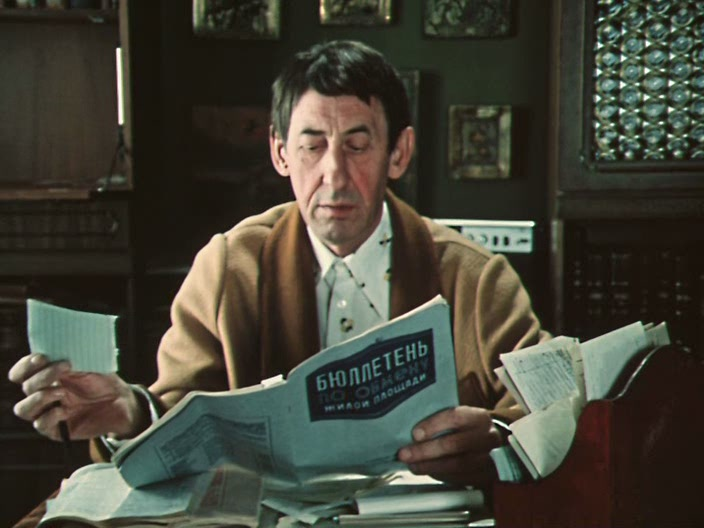

Итак у нас 53 переменных из которых 2 переменные 'Дата начала поиска' и 'Дата окончания поиска' будут использованы для получения целевой переменной: "Срок поиска артефакта"

Посмотрим, имеют ли наши данные пропуски.
* Пропуски по всему датасету: 

In [10]:
print(f'Пропуски по всему датасету: {round((np.sum(df.isna().values)/(df.size))*100, 2)} %')

Пропуски по всему датасету: 7.66 %


На первый взгляд, количество пропусков для нас некритично, но как они распределены по признакам и по записям?
* Для признаков, выведем список признаков с процентом имеющихся записей

In [11]:
missing_values_pct=100*(1-df.isna().sum()/df.shape[0]).round(2)
missing_values_pct[missing_values_pct<100].sort_values(ascending=False)

Дата окончания поиска                         99.0
Количество дополнительных отвилков            98.0
Количество пилотных отвилков                  98.0
Статус поиска                                 97.0
Глубина по отвилку                            94.0
Количество простоев без виновника             91.0
Количество простоев (прочие)                  91.0
Количество простоев по креплениям             91.0
Количество простоев по вине исследователей    91.0
Количество простоев по долбилам               91.0
Количество простоев в конце расщелины         91.0
Количество простоев в контроле поиска         91.0
Количество простоев по зельям                 91.0
Количество простоев в наклонном поиске        91.0
Количество простоев в поиске                  91.0
Количество простоев по вине королевства       91.0
Количество простоев                           90.0
Количество ремонтов                           90.0
Количество простоев по метеоусловиям          90.0
Количество осложнений          

Итак, меньше всего у нас данных по пути поиска в первом отвилке, и о глубине этого отвилка. Сами по себе, эти данные быть использованы не могут, но возможно мы сможем их использовать при конструировании признаков.

<Axes: ylabel='Count'>

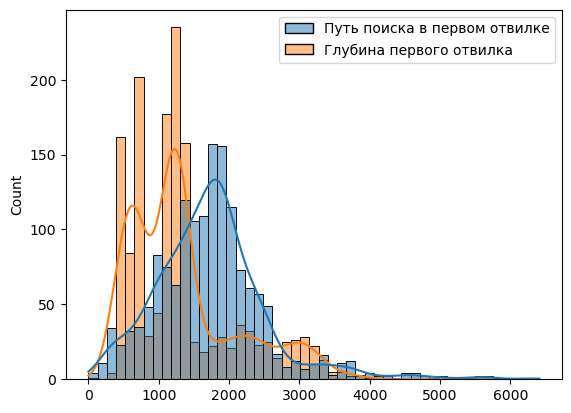

In [12]:
sns.histplot(df[['Путь поиска в первом отвилке', 'Глубина первого отвилка']], kde=True)

Путь поиска в главном отвилке представлен данными имеющими распределение близкое к нормальному. Данные по глубине первого отвилка полимодальны (наблюдаются 4 моды). По всей видимости, глубины отвилка определяются глубинами характером залегания продуктивных толщ, где ищутся артефакты. Пока это всё что мы о них знаем.

Теперь посмотрим какпропуски в данных распределяются по записям:

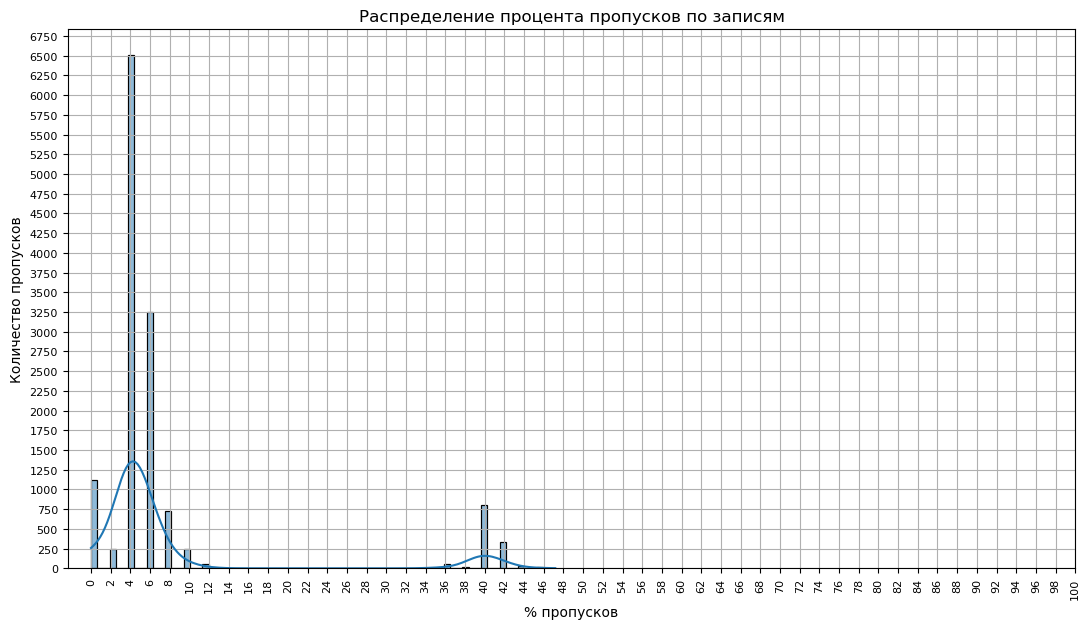

In [13]:
plt.figure(figsize=[13, 7])
sns.histplot(100*df.isna().sum(axis=1)/df.shape[1], bins=75, kde=True).grid()
plt.xticks(np.arange(0, 101, step=2.0), rotation=90, size=8)
plt.yticks(np.arange(0, 7000, step=250), size=8)
plt.xlabel('% пропусков')
plt.ylabel('Количество пропусков')
plt.title('Распределение процента пропусков по записям')
plt.show()

Итак, мы видим ярко выраженную моду в 4% пропусков у 6500 записей. При этом, у нас имеется и вторая мода в 40% пропусков у 750 записей. По всей видимости, мы идеем дело с разными причинами их отсутствия, различиями в сценариях поиска артефактов. 

Ниже приведено распределение пропусков по признакам.

Обращает на себя внимание дискретный характер распределения пропусков, а также его бимодальность. Возможно это как-то связано с неоднородностью данных, обуславливаемой различиями в сценариях поиска артефактов. С помощью тепловой диаграммы, посмотрим где у нас имеются пропуски

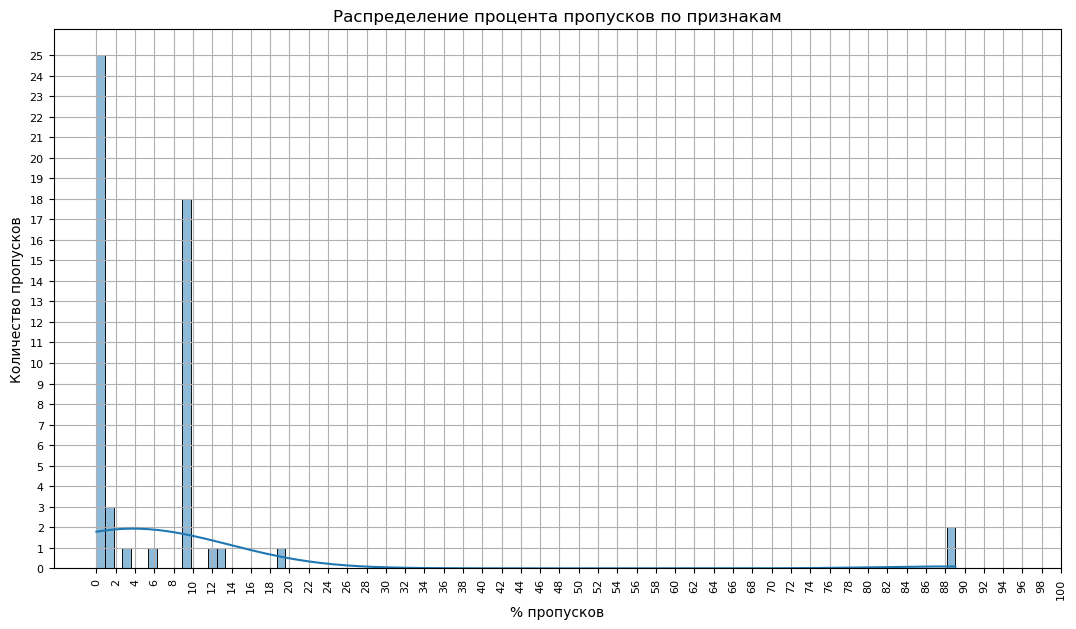

In [14]:
plt.figure(figsize=[13, 7])
sns.histplot(100*df.isna().sum(axis=0)/df.shape[0], bins=100, kde=True).grid()
plt.xticks(np.arange(0, 101, step=2.0), rotation=90, size=8)
plt.yticks(np.arange(0, 26, step=1), size=8)
plt.xlabel('% пропусков')
plt.ylabel('Количество пропусков')
plt.title('Распределение процента пропусков по признакам')
plt.show()

Здесь у нас 2 моды пропусков, 1 и 9% пропущенных значений признаков (25 и 18 признаков соответственно), и ожидаемо мы видим 2 признака у которых пропущено 88% значений, о них мы говорили выше. На тепловой диаграмме, пропуски выглядят так:

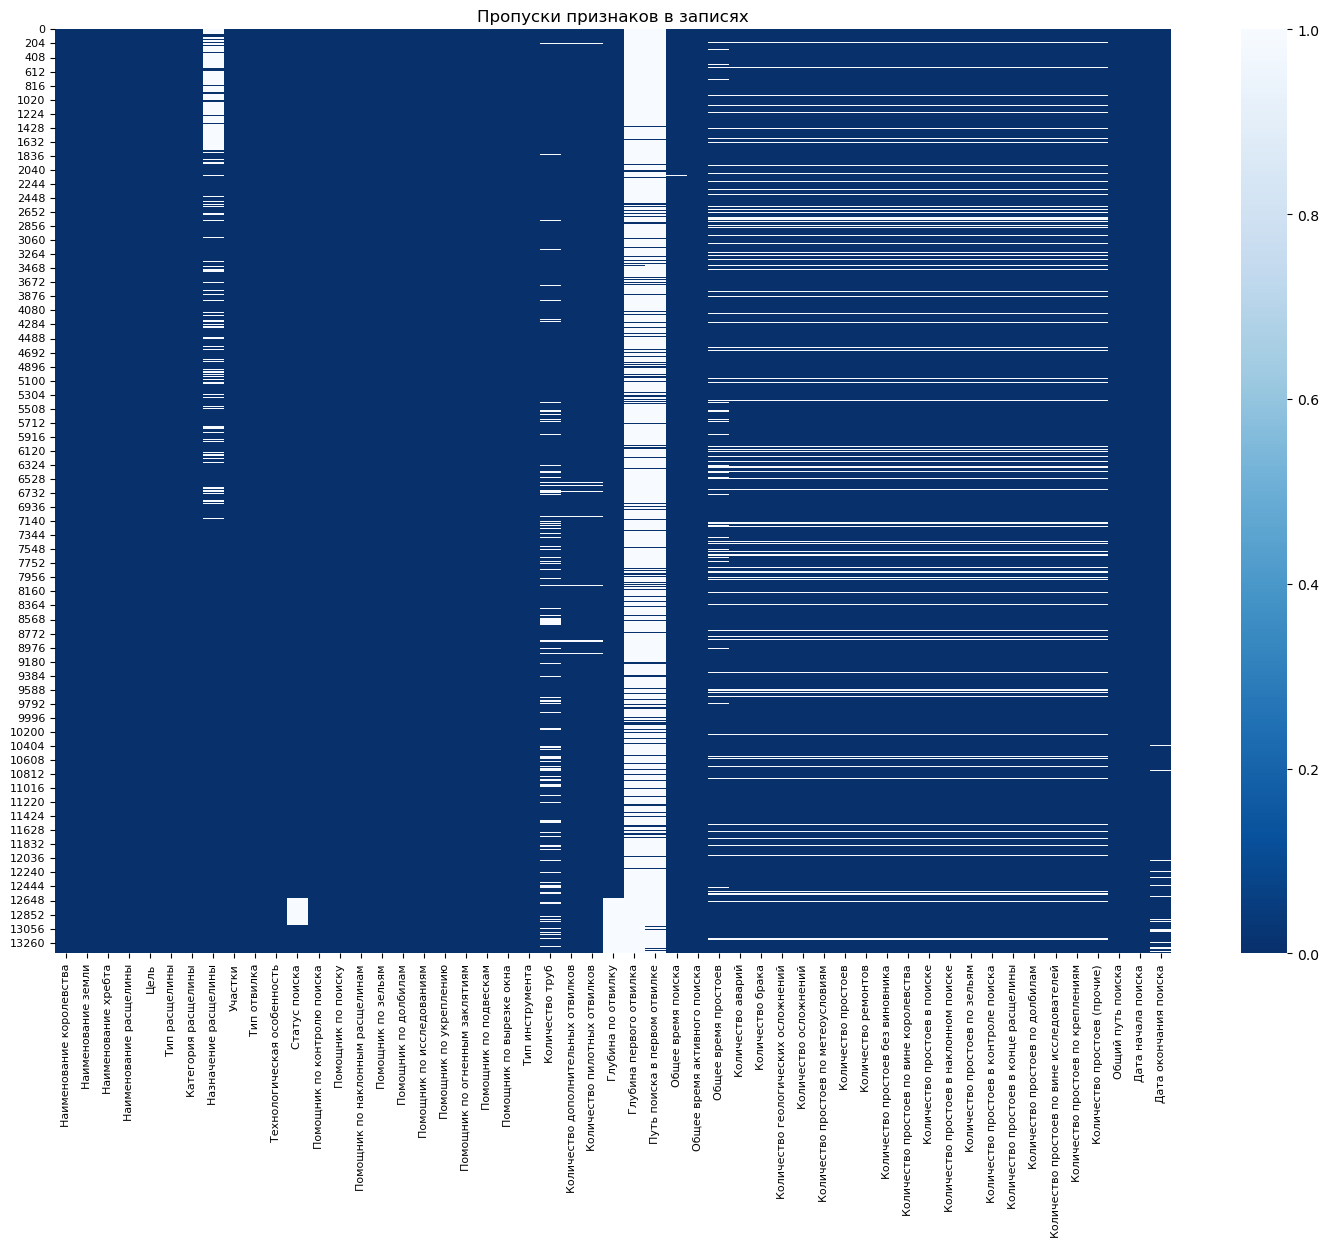

In [15]:
plt.figure(figsize=[18, 12])
sns.heatmap(df.isna(), cmap='Blues_r')
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Пропуски признаков в записях')
plt.show()

Как мы видели на гистограммах и как мы видим на тепловой диаграмме, пропуски имеют дискретный и в основном согасованный характер. То есть при отсутствии какого-то события, операции или технологического решения, наблюдается согласованное исчезновение данных и по другим связанным с ним событиям, операциям или решениям.

Также мы видим что визуально фиксируется отсутствие после записи 12600 (приблизительно) данных по параметру "глубина по отвилку" синхронизированное с отсутствием данных по параметру "глубина первого отвилка". Всё это наводит на мысль о том что данные упорядочены либо по времени, либо по какому-то иному критерию. В диапазоне 12600-12950 наблюдается аномальное отсутствие данных (окно) по признаку статус поиска.

Учитывая многочисленные пропуски, возможно хорошей идеей будет использование ансамблевых методов, которые хорошо справляются с этой проблемой

Посмотрим как сочетаются между собой отсутствия записей о статусе поиска и сведений об окончании помска.

In [16]:
100*df[['Статус поиска', 'Дата окончания поиска']].notna().value_counts(normalize=True).unstack().round(3)

Дата окончания поиска,False,True
Статус поиска,,
False,0.3,2.6
True,1.1,96.0


Из данных следует, что в 96% случаев у нас есть информация о статусе и дате окончания поиска, только в 0.3% случаев нет ясности о статусе поиска и нет даты завершения, в 2.6% случаях не проставлен статус, но фактически фиксируется завершение, а в 1,1% дата отсутствует, но известно что процесс завершён.

In [17]:
# comparz=pd.concat([df[df['Статус поиска'].isna()].select_dtypes(exclude='object').median(),
#            df.select_dtypes(exclude='object').median()], axis=1).round(2)
# comparz[comparz!=0]

# 2. Исследование целевой переменной

Ещё раз посмотрим на все переменные связанные со временем. Преобразовываем переменные 'Дата начала поиска', 'Дата окончания поиска' в формат datetime после чего находим значения для целевой функции "срок получения артефактов", которое преобразуем в часы.

In [18]:
df['Дата окончания поиска']=pd.to_datetime(df['Дата окончания поиска'])
df['Дата начала поиска']=pd.to_datetime(df['Дата начала поиска'])
df['Cрок получения артефактов']=round((df['Дата окончания поиска']-df['Дата начала поиска']).dt.total_seconds()/(3600*24), 2)

In [19]:
df['Cрок получения артефактов'].isna().sum()

189

In [20]:
timedata=df[['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Cрок получения артефактов']]

In [21]:
timedata.head().T

,0,1,2,3,4
Общее время поиска,11.47,51.47,10.92,11.29,12.86
Общее время активного поиска,10.75,46.21,9.35,10.21,12.01
Общее время простоев,0.47,5.20,1.57,1.07,0.85
Cрок получения артефактов,11.67,57.19,12.12,12.54,14.29


In [22]:
timedata.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Общее время поиска,13411.0,28.0,18.4,0.3,17.4,24.2,32.8,319.5
Общее время активного поиска,13416.0,23.8,16.7,0.3,16.0,21.4,27.6,635.9
Общее время простоев,11792.0,5.6,10.3,0.0,0.8,2.3,5.9,253.8
Cрок получения артефактов,13227.0,32.3,25.6,-314.8,19.6,27.3,37.4,708.1


Мы видим что:
* Срок получения артефактов всегда больше общего времени поиска, которое равно сумме общего времени активного поиска и времени простоя. При этом, переменная общее время поиска имеет 5 пропусков, которые устраняются суммированием Общего время активного поиска и общего времени простоев.
* Среди записей Целевой переменной имеются отрицательеые даты, что невозможно. Скорее всего при регистрации был перепутан порядок. Проверим это предположение

In [23]:
neg_time=df[df['Cрок получения артефактов']<=0]
df.loc[neg_time.index, 'Cрок получения артефактов']=(df.loc[neg_time.index, 'Дата начала поиска'] -df.loc[neg_time.index, 'Дата окончания поиска']).dt.total_seconds()/(3600*24)

df.loc[neg_time.index, ['Общее время поиска', 'Cрок получения артефактов']].round(2)


,Общее время поиска,Cрок получения артефактов
1126,14.02,314.83
11999,23.17,4.38
12188,19.26,39.60
12242,28.57,29.25


In [24]:
df[['Общее время поиска', 'Cрок получения артефактов']].corr()

,Общее время поиска,Cрок получения артефактов
Общее время поиска,1.000000,0.807209
Cрок получения артефактов,0.807209,1.000000


Первые 3 записи выглядят крайне подозрительно и их стоит исключить из рассмотрения, а последняя выглядит вполне реалистичной. Убираем лишние данные

In [25]:
df=df[~df.index.isin(neg_time.index.drop(12242))]

<Axes: xlabel='Общее время поиска', ylabel='Cрок получения артефактов'>

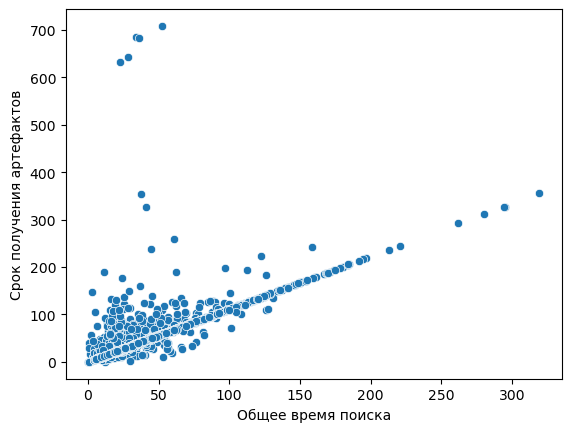

In [26]:
sns.scatterplot(x=df['Общее время поиска'].sort_values(), y=df['Cрок получения артефактов'].sort_values())

На графике мы видим:
1) Аномально высокие сроки получения артефактов полностью выбивающиеся из зависимости. Если их невозможно предсказать с помощью ближайшего аппоксимирующего признака, возможность предсказания этих значений с помощью иных признаков минимальна.
2) В некоторых случаях, зависимость практически линейная (возможно свидетельствует о манипуляциях с данными?)

In [27]:
ind=df[df['Cрок получения артефактов']>350].index

In [28]:
ind

Index([729, 9298, 9339, 9375, 9865, 11930, 12957], dtype='int64')

In [29]:
df=df.drop(ind)

По сути дела уже имеем в своём распоряжении оценку срок проведения поиска артефакта, это общее время поиска. При этом, в реальности у нас не будет этого признака, поскольку он находится только по окончании работ. С этой точки зрения, данный признак вводить в модель бессмысленно. Однако, эти данные могут быть полезны для восстановления отсутствующих значений целевой переменной. 

#### Соображения против:

* Этот подход возможно и неправильный, при некорректном моделировании целевой переменной, мы можем исказить зависимости
* Пропусков не так много, чтобы ими нельзя было пренебречь.

#### Соображения за:

* В нашем распоряжении данные, которые по сути будут изолированы от основной модели, если мы сейчас их используем и восстановим данные по целевой переменной, они нам больше не понадобятся и мы их удалим исключив таким образом утечку данных, но выжав из данных всё что они нам могут дать.
* Пропусков не так много, чтобы они могли сильно исказить зависимость.

Взвесив все за и против, принимаем решение об использовании модели для восстановления отсутствующих данных целевой переменной. Выделяем её из датасета

In [30]:
df['Общее время простоев']=df['Общее время простоев'].fillna(0)
df['Общее время поиска']=df['Общее время активного поиска']+df['Общее время простоев']

In [31]:
unknind=df['Cрок получения артефактов'].isna()
Xunkn, X = df.loc[unknind, ['Общее время поиска']], df.loc[~unknind, ['Общее время поиска']]
y = df.loc[~unknind, ['Cрок получения артефактов']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
# xgb=XGBRegressor()
# xgb.fit(X_train, y_train)

In [34]:
def regressor(model, X_train, X_test, y_train, y_test, X_target=None):
    rmetrics=dict()
    regr=model() 
    fitmodel=regr.fit(X_train.values, y_train.values)
    if X_target is None:
        y_pred=fitmodel.predict(X_test.values)
        rmetrics['MAE']=mae(y_test, y_pred).round(3)
        rmetrics['MAPE']=mape(y_test, y_pred).round(3)
        rmetrics['MSE']=mse(y_test, y_pred, squared=False).round(3)
        # print('Погрешности модели: \n MAE: {} \n MSE: {} \n MAPE: {}'.format(rmetrics['MAE'],
        #                                                                      rmetrics['MAPE'],
        #                                                                      rmetrics['MSE']))
        return pd.DataFrame(rmetrics, index=['metrics']), fitmodel
    else: 
        X_test=X_target # Учитывая специфику sklearn, мы е имеем право менять имя переменной которую предсказали
        y_target=fitmodel.predict(X_test)
        return y_target, fitmodel   

In [35]:
regressor(LinearRegression, X_train, X_test, y_train, y_test)[0]

C:\Users\User\.conda\envs\py37\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MAE,MAPE,MSE
metrics,1.053,0.032,4.373


Итак модель линейной регрессии позволяет предсказывать пропущенные значения срока поиска артефакта с погрешностью в 1 день (средняя абсолютная ошибка в процентах 3.4 %).

Делаем предсказание отсутствующих значений.

In [36]:
target=df.loc[unknind, ['Общее время поиска']]

a=pd.DataFrame(regressor(LinearRegression, X_train, X_test, y_train, y_test, target)[0])
df.loc[unknind, 'Cрок получения артефактов']=pd.DataFrame(regressor(LinearRegression, X_train, X_test, y_train, y_test, target)[0]).values
display(df.loc[unknind, 'Cрок получения артефактов'].head())

C:\Users\User\.conda\envs\py37\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\User\.conda\envs\py37\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


5996      36.971751
9579      79.631936
10209     77.770808
10397     35.682416
10608    107.436734
Name: Cрок получения артефактов, dtype: float64

In [37]:
df['Cрок получения артефактов']

0        11.670000
1        57.190000
2        12.120000
3        12.540000
4        14.290000
           ...    
13411    21.120000
13412    28.880000
13413    17.485969
13414    22.540000
13415    63.442367
Name: Cрок получения артефактов, Length: 13406, dtype: float64

Оценки используемых величин целевой функции "Cрок получения артефактов" получены, продолжаем рассмотрение остальных переменных.

<Axes: xlabel='Cрок получения артефактов', ylabel='Count'>

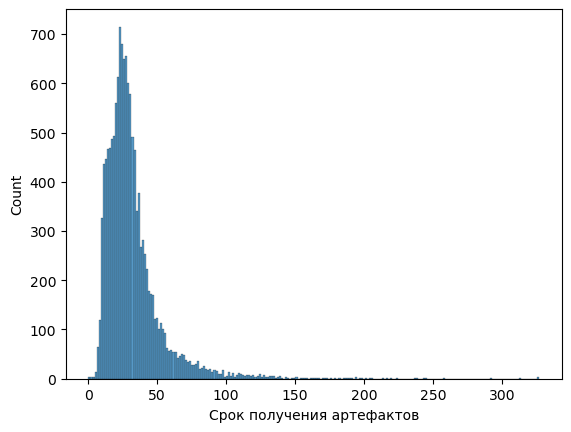

In [38]:
sns.histplot(df['Cрок получения артефактов'])

Посморим как оно распределено по королевствам 

In [39]:
df.groupby(['Наименование королевства'])[['Cрок получения артефактов']].agg(['min', 'max']).round(2)

Cрок получения артефактов        
                                               min     max
Наименование королевства                                  
Аэдирн                                        8.46  167.50
Бругге                                        6.38  200.77
Верден                                        5.58  198.00
Зеррикания                                    4.66  327.02
Каэд Ду                                       2.00  327.02
Кэдвен                                        0.23  312.46
Лирия и Ривия                                 5.86  182.46
Редания                                       4.00  292.00
Скеллиге                                     10.92  242.39
Темерия                                       0.37  258.25

Удаляем серии данных которые нам более не потребуются

In [40]:
df=df[['Наименование земли', 'Наименование хребта',
       'Наименование расщелины', 'Цель', 'Тип расщелины',
       'Категория расщелины', 'Назначение расщелины', 'Участки', 'Тип отвилка',
       'Технологическая особенность', 'Статус поиска',
       'Помощник по контролю поиска', 'Помощник по поиску',
       'Помощник по наклонным расщелинам', 'Помощник по зельям',
       'Помощник по долбилам', 'Помощник по исследованиям',
       'Помощник по укреплению', 'Помощник по огненным заклятиям',
       'Помощник по подвескам', 'Помощник по вырезке окна', 'Тип инструмента',
       'Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам',
       'Количество простоев по вине исследователей',
       'Количество простоев по креплениям', 'Количество простоев (прочие)',
       'Общий путь поиска', 'Cрок получения артефактов']]

# 3. Независимые переменнные (признаки)

РассмотримТеперь посмотрим, к какому типу относятся имеющиеся данные и какое количество классов мы для них наблюдаем

In [41]:
df.nunique().sort_values()

Статус поиска                                    2
Количество простоев по вине королевства          3
Цель                                             3
Тип расщелины                                    4
Назначение расщелины                             5
Количество простоев по вине исследователей       5
Количество пилотных отвилков                     7
Количество простоев в контроле поиска            8
Количество труб                                  8
Категория расщелины                              9
Тип отвилка                                     12
Количество простоев по метеоусловиям            14
Количество дополнительных отвилков              15
Количество простоев по долбилам                 16
Количество простоев в конце расщелины           16
Количество простоев по креплениям               16
Помощник по вырезке окна                        25
Количество простоев (прочие)                    25
Количество простоев по зельям                   27
Количество простоев в наклонном

Итак у нас 24 объектных переменных, 28 переменных с плавающей точкой и одна целочисленная переменная.
Обращает на себя внимание высокая точность переменных, явно избыточная в данном случае, посмотрим как распределены величины 

In [42]:
df.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
Наименование расщелины,13406.0,4987.3140,2865.9385,1.00,2536.5000,5047.50,7497.0000,9998.00
Количество труб,11670.0,2.6287,1.0929,0.90,1.8000,2.70,3.6000,7.20
Количество дополнительных отвилков,13198.0,0.5577,1.4772,0.00,0.0000,0.00,0.0000,21.00
Количество пилотных отвилков,13198.0,0.3429,0.8241,0.00,0.0000,0.00,0.0000,8.00
Глубина по отвилку,12608.0,3165.4629,651.5816,0.00,2749.5000,3162.60,3661.2000,5931.00
Глубина первого отвилка,1468.0,1329.6590,771.5262,0.00,687.6675,1192.05,1473.3000,3949.20
Путь поиска в первом отвилке,1537.0,1737.8141,800.3603,36.90,1254.6000,1730.70,2070.9000,6412.50
Количество аварий,12130.0,0.5406,4.2381,0.00,0.0000,0.00,0.0000,280.80
Количество брака,12130.0,1.1765,2.9652,0.00,0.0000,0.00,1.8000,100.80
Количество геологических осложнений,12130.0,0.4858,8.7565,0.00,0.0000,0.00,0.0000,621.90


In [43]:
df.select_dtypes(exclude='object').head(3).T

,0,1,2
Наименование расщелины,2903.00,1332.00,1027.00
Количество труб,2.70,3.60,2.70
Количество дополнительных отвилков,0.00,2.00,0.00
Количество пилотных отвилков,0.00,0.00,0.00
Глубина по отвилку,2889.00,3474.00,2596.50
Глубина первого отвилка,NaN,NaN,NaN
Путь поиска в первом отвилке,NaN,NaN,NaN
Количество аварий,0.00,1.80,0.00
Количество брака,2.70,0.90,0.00
Количество геологических осложнений,0.00,0.00,0.00


In [44]:
df.select_dtypes(include='object').head(3).T

,0,1,2
Наименование земли,Приобия,Сутор,Приобия
Наименование хребта,684,1141,18А.28
Цель,поиск,поиск,поиск
Тип расщелины,наклонная,горизонтальная,наклонная
Категория расщелины,Нагнетательная,Поисковая,Поисковая
Назначение расщелины,Магическое воздействие,NaN,NaN
Участки,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...
Тип отвилка,Материнский,Материнский,Материнский
Технологическая особенность,наклонная,горизонтальная + отвилков 40,наклонная
Статус поиска,завершен,завершен,завершен


Количества простоев и происшествий у нас нецелочисленно, согласно уточнениям они приведены в относитеьных единицах. Целочисленный же параметр наименования лощины, изменяется в пределах 1...9999.для данной переменной достаточно будет типа int16

In [45]:
df['Наименование расщелины']=df['Наименование расщелины'].astype('int16')

Посмотрим какой точностью переменных с плавающей запятой мы можем задаться в наших расчётах. Рассмотрим доступные нам типы 

In [46]:
a=df.select_dtypes('float64')

In [47]:
# максимальное значение модуля разности между значением переменной в исходном типе и значением после приведения типа, отнесённого к исходному значению и выраженному в процентах.
downcaster=pd.DataFrame([100*((abs( a-a.astype(datatype, errors='ignore')))/a).max().sort_values().round(8) for datatype in ['float16', 'float32']], index=['float16', 'float32']).T
downcaster

,float16,float32
Количество дополнительных отвилков,0.000000,0.000000
Количество пилотных отвилков,0.000000,0.000000
Количество простоев по вине королевства,0.010851,0.000003
Количество труб,0.028935,0.000003
Количество простоев по вине исследователей,0.028935,0.000003
Количество простоев по долбилам,0.028935,0.000005
Количество простоев в контроле поиска,0.028935,0.000005
Количество простоев по метеоусловиям,0.028935,0.000005
Количество простоев по креплениям,0.033069,0.000005
Количество простоев в конце расщелины,0.033069,0.000005


Как мы видим максимально достигаемая погрешность не превышает 0.05%. Возможно мы можем ограничиться и такой точностью, но пока, в качестве компромисса снизим точность до float32. 

In [48]:
mask=downcaster.query('float16>0').index
df[mask]=df[mask].astype('float32')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13406 entries, 0 to 13415
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Наименование земли                          13406 non-null  object 
 1   Наименование хребта                         13406 non-null  object 
 2   Наименование расщелины                      13406 non-null  int16  
 3   Цель                                        13406 non-null  object 
 4   Тип расщелины                               13404 non-null  object 
 5   Категория расщелины                         13406 non-null  object 
 6   Назначение расщелины                        10791 non-null  object 
 7   Участки                                     13406 non-null  object 
 8   Тип отвилка                                 13406 non-null  object 
 9   Технологическая особенность                 13406 non-null  object 
 10  Статус поиска  

Замена типа данных с float64 на float16 приводит к относительной ошибке вычисления 

Признаки с количеством отвилков как мы видим укладываются в float16, не являются ли выражаемые через них переменные целочисленными? Проверим это, и при необходимости превратим их в целочисленные. 

In [50]:
otv=pd.concat([df['Количество дополнительных отвилков'].value_counts(),
               df['Количество пилотных отвилков'].value_counts()], axis=1).fillna(0)
otv.columns=['№ доп. отвилок', '№ пилотных отвилок']
otv.T

,0.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,13.0,12.0,16.0,17.0,15.0,21.0
№ доп. отвилок,10807.0,1545.0,321.0,188.0,122.0,90.0,68.0,28.0,11.0,8.0,5.0,2.0,1.0,1.0,1.0
№ пилотных отвилок,11132.0,1757.0,259.0,35.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Наше предположение подтвердилось, и мы видим огромный дисбаланс по этим переменным.Видно что подавляющее большинство объектов не имеет отвилков. Приводим переменные к типу int8

In [51]:
df[['Количество дополнительных отвилков',
    'Количество пилотных отвилков' ]]=df[['Количество дополнительных отвилков',
                                          'Количество пилотных отвилков']].astype('Int8', errors='ignore')

In [52]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 13406 entries, 0 to 13415
Columns: 48 entries, Наименование земли to Cрок получения артефактов
dtypes: Int8(2), float32(24), int16(1), object(21)
memory usage: 38.9 MB


Попробуем "в лоб" прокореллировать время и признаки, не вдаваясь в подробности

<Axes: >

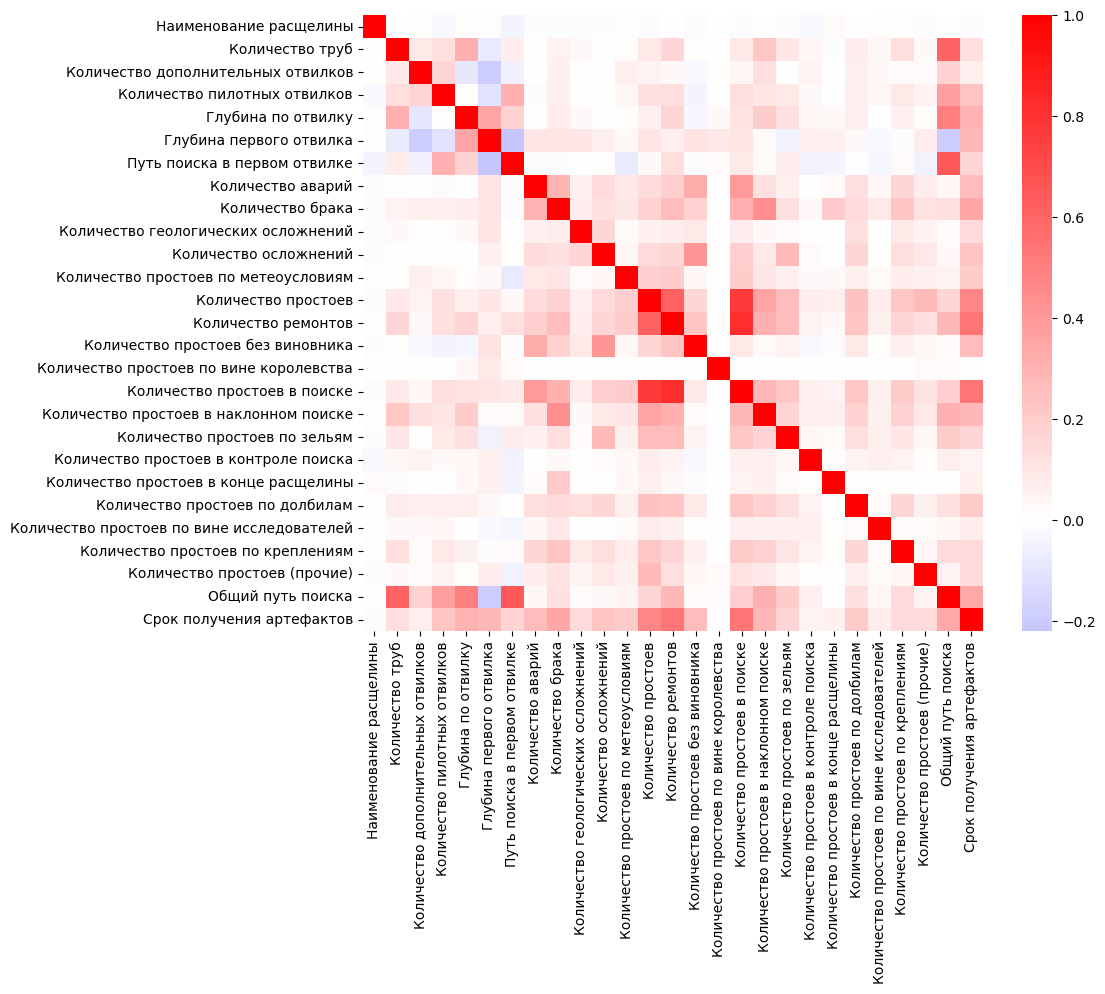

In [53]:
plt.figure(figsize=[10, 8])
sns.heatmap(df.select_dtypes(exclude='object').corr().round(2), cmap='bwr', center=0)

In [54]:
X_num=df.select_dtypes(exclude='object').iloc[:,:-1].drop(columns=['Глубина первого отвилка', 'Путь поиска в первом отвилке', 'Количество простоев по вине королевства' ])

In [55]:
# sscaler = StandardScaler()
# mmscaler=MinMaxScaler()
# X_num_ss=pd.DataFrame(sscaler.fit_transform(X_num), index=X_num.index, columns=X_num.columns).add_suffix('_ss')
# X_num_mms=pd.DataFrame(mmscaler.fit_transform(X_num), index=X_num.index, columns=X_num.columns).add_suffix('_mms')
# X_num=pd.concat([X_num, X_num_ss, X_num_mms], axis=1)

In [56]:
X_num.isna().sum().sort_values()

Наименование расщелины                           0
Общий путь поиска                                4
Количество дополнительных отвилков             208
Количество пилотных отвилков                   208
Глубина по отвилку                             798
Количество простоев по креплениям             1268
Количество простоев по вине исследователей    1268
Количество простоев по долбилам               1268
Количество простоев в конце расщелины         1268
Количество простоев в контроле поиска         1268
Количество простоев по зельям                 1268
Количество простоев в наклонном поиске        1268
Количество простоев в поиске                  1268
Количество простоев без виновника             1268
Количество простоев (прочие)                  1268
Количество простоев                           1276
Количество простоев по метеоусловиям          1276
Количество осложнений                         1276
Количество геологических осложнений           1276
Количество брака               

In [57]:
(1-X_num.isna().sum()/X_num.shape[0])

Наименование расщелины                        1.000000
Количество труб                               0.870506
Количество дополнительных отвилков            0.984485
Количество пилотных отвилков                  0.984485
Глубина по отвилку                            0.940474
Количество аварий                             0.904819
Количество брака                              0.904819
Количество геологических осложнений           0.904819
Количество осложнений                         0.904819
Количество простоев по метеоусловиям          0.904819
Количество простоев                           0.904819
Количество ремонтов                           0.904819
Количество простоев без виновника             0.905415
Количество простоев в поиске                  0.905415
Количество простоев в наклонном поиске        0.905415
Количество простоев по зельям                 0.905415
Количество простоев в контроле поиска         0.905415
Количество простоев в конце расщелины         0.905415
Количество

In [58]:
y_num=df.iloc[:,-1]

Мы пока не можем понять, какие признаки для нас представляют ценность и стоит попытаться заполнить пропуски, а для каких это бессмысленно, поскольку вклад этого признак в модель невелик. Попробуем построить модель связывающую целевую переменную с числовыми признаками, с помощью случайного леса, и в пользу этого решения имеются следующие соображения:
1) Он позволяет работать с ненормализированными данными, а мы пока не определились с методом нормализации
2) Он устойчив к наличию пропуска в данных
3) Он позволяет оценить важность каждой независимой переменной.
   

In [59]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [60]:
def feature_selection(X, y, title, n_estimators=100, random_state=42, threshold=0.04, plotting=True):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X, y)
    sorted_idx = np.argsort(rf.feature_importances_)
    importances = rf.feature_importances_[sorted_idx]
    features = X.columns[sorted_idx]
    if plotting:
        plt.figure(figsize=(10, 6))  # Указываем размер фигуры для лучшей визуализации
        plt.barh(features[-15:], importances[-15:])
        plt.axvline(x=threshold, color='r', label='Threshold')
        plt.title(title)
        plt.grid()
        plt.xlabel("Random Forest Feature Importance")
        plt.xticks(np.linspace(0, importances.max() * 1.1, num=10).round(3), rotation=90)
        plt.legend()
        plt.show()
    candidates = features[importances >= threshold]
    return candidates, pd.Series(candidates, importances[importances >= threshold])

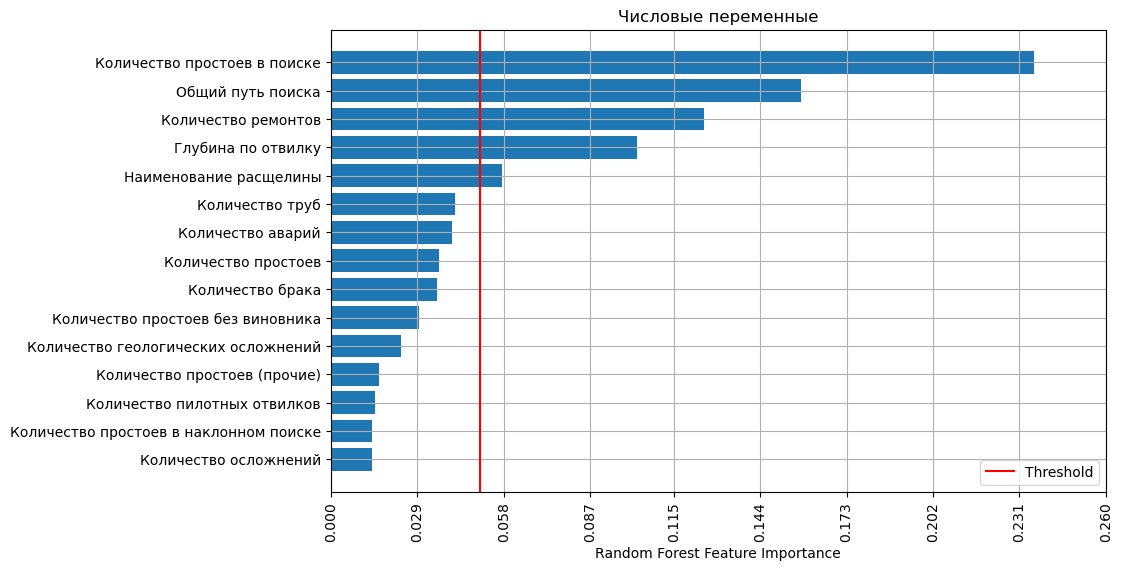

In [61]:
numfs=feature_selection(X_num, y_num, 'Числовые переменные', n_estimators=50, random_state=42, threshold=0.05, plotting=True)

In [62]:
numfs[0]

Index(['Наименование расщелины', 'Глубина по отвилку', 'Количество ремонтов',
       'Общий путь поиска', 'Количество простоев в поиске'],
      dtype='object')

Для дальнейшего рассмотрения, мы оставим только признаки со значимостью >0.05

In [63]:
X_num=X_num[numfs[0]]


Мы разобрались с численными переменными, приступим к рассмотрению категориальных

# 4. Категориальные переменные

Посмотрим как у нас распределены категориальные переменные

In [64]:
catfeats=df.select_dtypes(include='object')

display(catfeats.nunique().sort_values(ascending=False))
display(catfeats.head())

Наименование хребта                 703
Помощник по наклонным расщелинам    229
Помощник по укреплению              186
Наименование земли                  149
Технологическая особенность         149
Помощник по поиску                  125
Помощник по долбилам                122
Помощник по подвескам               117
Участки                             106
Помощник по контролю поиска          99
Помощник по зельям                   86
Помощник по исследованиям            82
Помощник по огненным заклятиям       80
Тип инструмента                      59
Помощник по вырезке окна             25
Тип отвилка                          12
Категория расщелины                   9
Назначение расщелины                  5
Тип расщелины                         4
Цель                                  3
Статус поиска                         2
dtype: int64

,Наименование земли,Наименование хребта,Цель,Тип расщелины,Категория расщелины,Назначение расщелины,Участки,Тип отвилка,Технологическая особенность,Статус поиска,Помощник по контролю поиска,Помощник по поиску,Помощник по наклонным расщелинам,Помощник по зельям,Помощник по долбилам,Помощник по исследованиям,Помощник по укреплению,Помощник по огненным заклятиям,Помощник по подвескам,Помощник по вырезке окна,Тип инструмента
0,Приобия,684,поиск,наклонная,Нагнетательная,Магическое воздействие,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Геральт и Компания,Компания Глоруин,,Краснолюдский Цех Буровых Технологий,,Гильдия Временных Исследований,Искусство Стихийных Служб,,,,
1,Сутор,1141,поиск,горизонтальная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,горизонтальная + отвилков 40,завершен,,,Ковен Ветра и Бурения; Цех Технологического Ге...,Альянс Мудрецов и Травников Нильфгаарда,Гильдия Новых Технологий,Стихия,Магическая Торговая Управа,,,,
2,Приобия,18А.28,поиск,наклонная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Нежить и Услуги,Компания Глоруин,Туманные Кузнецы Ши,Краснолюдский Цех Буровых Технологий,АО НПП Защитники Проклятых,,Строительный Технический Ковен,,,,
3,Приобия,9А.18,поиск,наклонная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Геральт и Компания,Туманные Кузнецы Ши,Туманные Кузнецы Ши,Краснолюдский Цех Буровых Технологий,АО НПП Защитники Проклятых,,Строительный Технический Ковен,,,,
4,Приобия,627,поиск,наклонная,Нагнетательная,Магическое воздействие,верхнее укрепление+среднее укрепление+основное...,Материнский,наклонная,завершен,Геральт и Компания,Туманные Кузнецы Ши,Союз Геомагических Сервисов,Туманные Кузнецы Ши,Краснолюдский Цех Буровых Технологий,,Искусство Стихийных Служб; Строительный Технич...,,,,


Пройдёмся по переменным, преобразуя их методом горячего кодирования. Самое высокое значение количества уникальных значений фиксируется для признака "Наименование хребта" и мы начинаем c этого признака. 

### 4.1 Наименование хребта

In [65]:
X_ridges=df['Наименование хребта']

In [66]:
# df[['Общее время поиска', 'срок поиска артефакта']].corr()

In [67]:
X_ridges.value_counts()

Наименование хребта
1333     310
1513     278
1916     268
715      267
1047     257
        ... 
3бис6      1
1044Н      1
1324Н      1
1209       1
1906       1
Name: count, Length: 703, dtype: int64

<Axes: xlabel='Наименование хребта'>

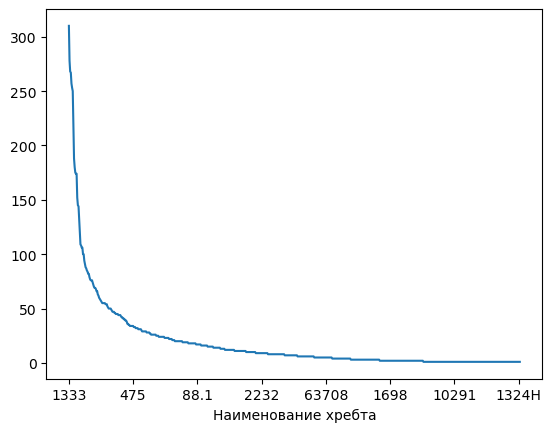

In [68]:
X_ridges.value_counts().plot()

Снижение количества классов происходит по экспоненциальному закону. Первоначально возникла мысль собрать все классы представленные малым количеством наблюдений в единый класс others, однако при оценке важности, он занимал лидирующее место среди других классов переменной, что означало бы повышение важности любого непопулярного класса, который маркировался бы как "others". Поэтому было принято решение оценить важность всех классов данной переменной. 

In [69]:
X_ridges=pd.get_dummies(X_ridges)

In [70]:
s_t=time.time()
ridges=feature_selection(X_ridges, y_num, 'Наименования хребтов', n_estimators=100, random_state=42, threshold=0.04, plotting=False) # Ввиду большого количества проеряемых классов, вывод графика отключён.
e_t=time.time()

In [71]:
print(f'Затраты времени на поиск претендентов: {round((e_t-s_t)/60, 2)} минут')

Затраты времени на поиск претендентов: 6.25 минут


In [72]:
display(ridges[0])

Index(['10529', '3638'], dtype='object')

У нас только 2 хребта дотягивают до уровня 0.05. Для дальнейшего рассмотрения оставим только их.

In [73]:
X_ridges=X_ridges[ridges[0]]

### 4.2 Помощник по наклонным расщелинам 

Рассмотрим следующий класс категориальных переменных 

In [74]:
df['Помощник по наклонным расщелинам'].head()

0                                                     
1    Ковен Ветра и Бурения; Цех Технологического Ге...
2                                  Туманные Кузнецы Ши
3                                  Туманные Кузнецы Ши
4                          Союз Геомагических Сервисов
Name: Помощник по наклонным расщелинам, dtype: object

В строке с индексом 1, мы видим что позиция содержит в себе информацию о двух исполнителях. Наша задача разделить подобные записи и провести горячее кодирование. Для этого мы будем использовать специальную функцию

In [75]:
def feat_ohe(series, word_to_remove='', splitter=''):
    ohevar=pd.get_dummies(series.str.replace(word_to_remove, '').str.split(splitter, expand=True))
    cols=list(set([col.split('_')[1].strip() for col in ohevar.columns]))[1:]
    for col in cols:
        ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)
    return ohevar[cols]

In [76]:
X_slp_clft=feat_ohe(df['Помощник по наклонным расщелинам'], word_to_remove='', splitter=';|,') # встречаются два вида разделителей, поэтому мы передаём в функцию каждый из них.

C:\Users\User\AppData\Local\Temp\ipykernel_10208\2692826716.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)


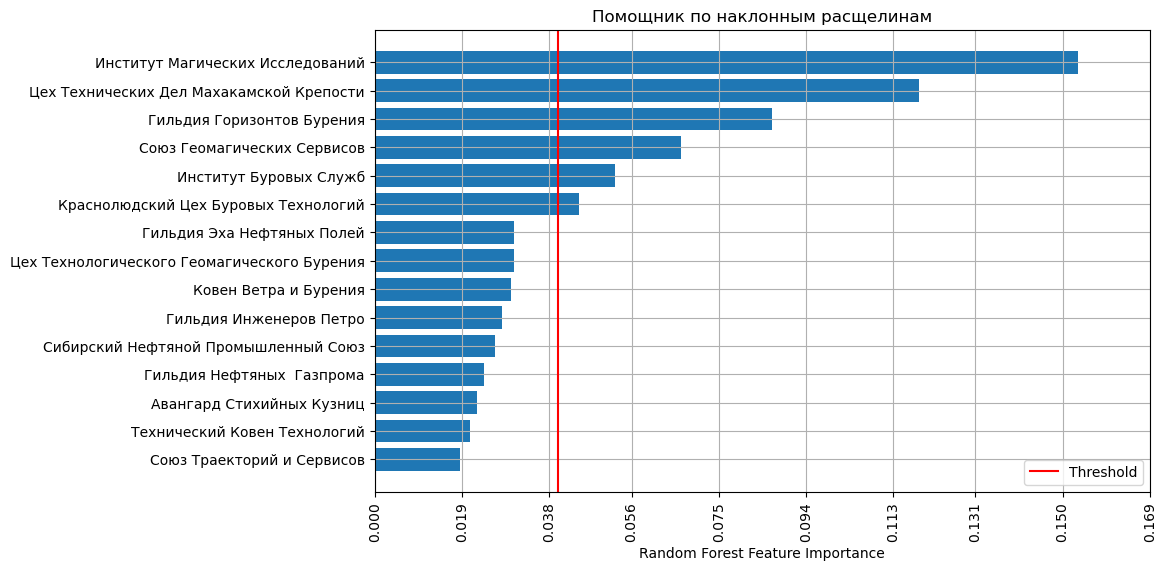

In [77]:
s_t=time.time()
slope_cleft=feature_selection(X_slp_clft, y_num, 'Помощник по наклонным расщелинам', n_estimators=100, random_state=42, threshold=0.04, plotting=True) # Ввиду большого количества проеряемых классов, вывод графика отключён.
e_t=time.time()

In [78]:
print(f'Затраты времени на поиск претендентов: {round((e_t-s_t)/60, 2)} минут')
display(slope_cleft[1])

Затраты времени на поиск претендентов: 0.06 минут


0.044583        Краснолюдский Цех Буровых Технологий
0.052322                      Институт Буровых Служб
0.066819                 Союз Геомагических Сервисов
0.086647                  Гильдия Горизонтов Бурения
0.118656    Цех Технических Дел Махакамской Крепости
0.153458            Институт Магических Исследований
dtype: object

In [79]:
feat_ohe(df['Тип отвилка'], word_to_remove='укрепление', splitter=';')

,Пилотный,Боковой,Дополнительный,Материнский
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13411,0,1,0,0
13412,0,0,0,1
13413,0,0,1,1
13414,0,1,0,0


In [80]:
X_slp_clft=X_slp_clft[slope_cleft[1]].astype(bool)

In [81]:
X_slp_clft.dtypes

Краснолюдский Цех Буровых Технологий        bool
Институт Буровых Служб                      bool
Союз Геомагических Сервисов                 bool
Гильдия Горизонтов Бурения                  bool
Цех Технических Дел Махакамской Крепости    bool
Институт Магических Исследований            bool
dtype: object

### 4.3 Помощник по укреплению   

In [82]:
df['Помощник по укреплению'].head()

0                            Искусство Стихийных Служб
1                           Магическая Торговая Управа
2                       Строительный Технический Ковен
3                       Строительный Технический Ковен
4    Искусство Стихийных Служб; Строительный Технич...
Name: Помощник по укреплению, dtype: object

In [83]:
X_reinf=feat_ohe(df['Помощник по укреплению'], word_to_remove='', splitter=',|;') 
X_reinf.head(15).T.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Гильдия Мастеров Нефти,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Небо Кровавого Грота,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Гильдия Нефтяных Буровых Кузнецов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Гильдия Новейших Строительных Технологий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Гильдия Рунных Инженеров,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Гильдия Инженеров Петро,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Орден Промышленного Роста,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Северный Технический Университет,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Союз Бурильщиков Петра,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Туманные Кузнецы Ши,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


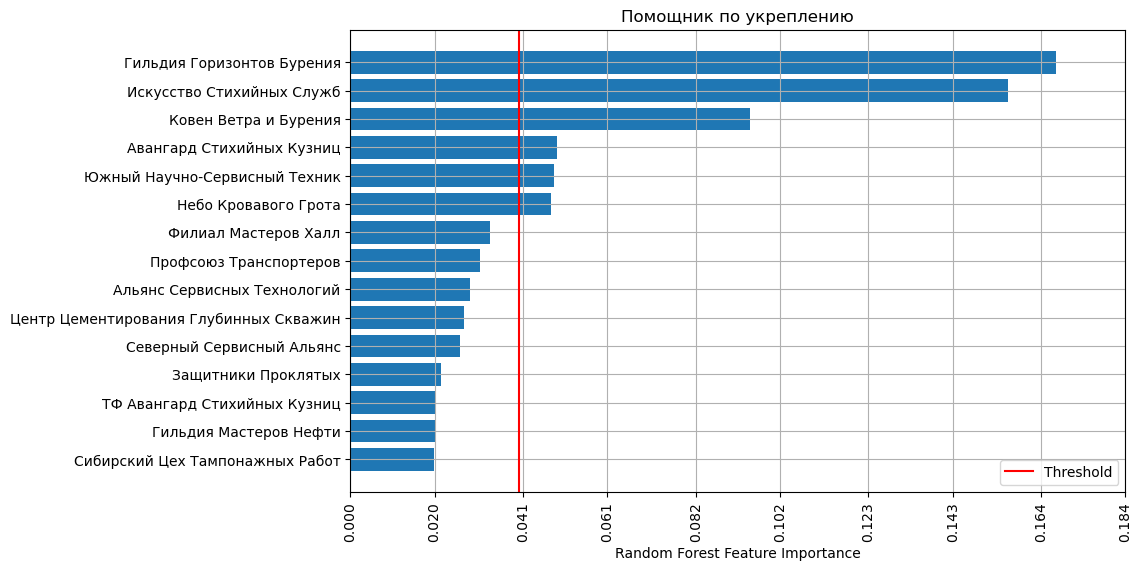

Затраты времени на поиск претендентов: 0.06 минут


In [84]:
s_t=time.time()
reinf=feature_selection(X_reinf, y_num, 'Помощник по укреплению', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 
e_t=time.time()

print(f'Затраты времени на поиск претендентов: {round((e_t-s_t)/60, 2)} минут')


In [85]:
X_reinf=X_reinf[reinf[1]]

In [86]:
X_reinf.head().T.head(len(reinf[1]))

,0,1,2,3,4
Небо Кровавого Грота,0,0,0,0,0
Южный Научно-Сервисный Техник,0,0,0,0,0
Авангард Стихийных Кузниц,0,0,0,0,0
Ковен Ветра и Бурения,0,0,0,0,0
Искусство Стихийных Служб,1,0,0,0,1
Гильдия Горизонтов Бурения,0,0,0,0,0


In [87]:
feat_ohe(df['Тип отвилка'], word_to_remove='укрепление', splitter=';')

,Пилотный,Боковой,Дополнительный,Материнский
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13411,0,1,0,0
13412,0,0,0,1
13413,0,0,1,1
13414,0,1,0,0


### 4.4 Наименование земли

In [88]:
X_lands=pd.get_dummies(df['Наименование земли'])

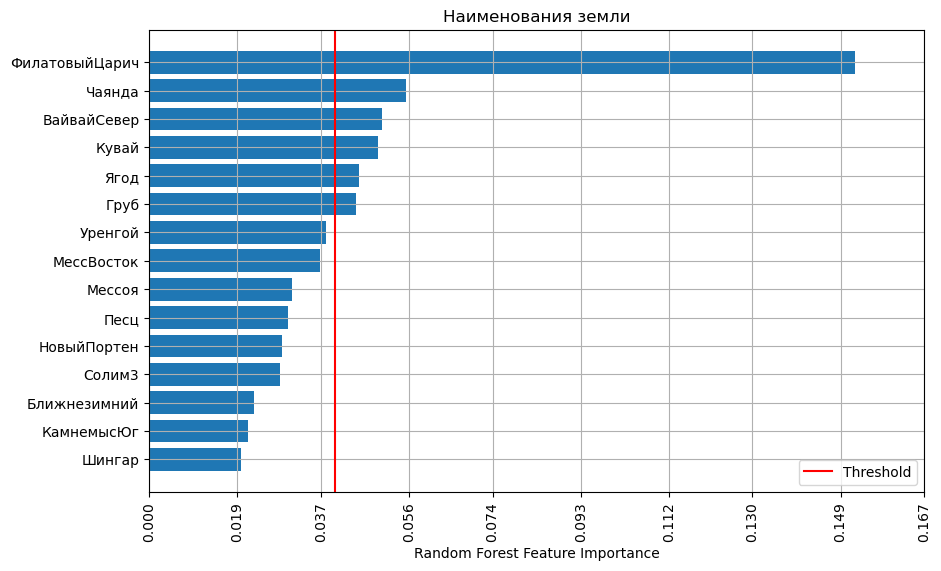

In [89]:
s_t=time.time()
lands=feature_selection(X_lands, y_num, 'Наименования земли', n_estimators=100, random_state=42, threshold=0.04, plotting=True) # Ввиду большого количества проеряемых классов, вывод графика отключён.
e_t=time.time()

In [90]:
print(f'Затраты времени на поиск претендентов: {round((e_t-s_t)/60, 2)} минут')
display(lands[1])

Затраты времени на поиск претендентов: 0.23 минут


0.044649              Груб
0.045299              Ягод
0.049234             Кувай
0.050228       ВайвайСевер
0.055283            Чаянда
0.152107    ФилатовыйЦарич
dtype: object

In [91]:
lands[0]

Index(['Груб', 'Ягод', 'Кувай', 'ВайвайСевер', 'Чаянда', 'ФилатовыйЦарич'], dtype='object')

In [92]:
X_lands=X_lands[lands[0]]

In [93]:
X_lands.head().T.head(len(lands[1]))   

,0,1,2,3,4
Груб,False,False,False,False,False
Ягод,False,False,False,False,False
Кувай,False,False,False,False,False
ВайвайСевер,False,False,False,False,False
Чаянда,False,False,False,False,False
ФилатовыйЦарич,False,False,False,False,False


In [94]:
X_lands.dtypes

Груб              bool
Ягод              bool
Кувай             bool
ВайвайСевер       bool
Чаянда            bool
ФилатовыйЦарич    bool
dtype: object

### 4.5 Технологическая особенность  

In [95]:
df['Технологическая особенность']

0                                                наклонная
1                             горизонтальная + отвилков 40
2                                                наклонная
3                                                наклонная
4                                                наклонная
                               ...                        
13411                                       горизонтальная
13412    горизонтальная + комбинированное магическое во...
13413                           многощельная + отвилков 40
13414                   наклонная + магическое воздействие
13415              многощельная + отвилков 80 + пилотов 20
Name: Технологическая особенность, Length: 13406, dtype: object

Признак который мы сейчас рассматриваем достаточно сложный. Здесь мы имеем не только различные виды расщелин, но и числовые данные "зашитые" непосредственно в запись. 

In [96]:
X_peculiarity=feat_ohe(df['Технологическая особенность'], word_to_remove='', splitter='+')

X_peculiarity.columns.sort_values()

Index(['вертикальная', 'горизонтальная',
       'комбинированное магическое воздействие', 'магическое воздействие',
       'многощельная', 'наклонная', 'отвилков 120', 'отвилков 140',
       'отвилков 160', 'отвилков 180', 'отвилков 200', 'отвилков 220',
       'отвилков 240', 'отвилков 260', 'отвилков 280', 'отвилков 340',
       'отвилков 40', 'отвилков 60', 'отвилков 80', 'пилотов 100',
       'пилотов 120', 'пилотов 20', 'пилотов 40', 'пилотов 60', 'пилотов 80'],
      dtype='object')

In [97]:
X_peculiarity

,многощельная,пилотов 20,наклонная,отвилков 40,горизонтальная,пилотов 60,пилотов 40,вертикальная,отвилков 180,отвилков 260,отвилков 160,отвилков 240,комбинированное магическое воздействие,отвилков 140,отвилков 220,пилотов 120,пилотов 80,отвилков 200,отвилков 80,отвилков 340,отвилков 280,магическое воздействие,отвилков 120,отвилков 60,пилотов 100
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13412,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0
13413,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13414,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
X_peculiarity['кол-во Отвилков']=df['Технологическая особенность'][df['Технологическая особенность'].str.contains('отвилков')].str.extract('(\d+)').astype('int16')
X_peculiarity['кол-во Пилотов']=df['Технологическая особенность'][df['Технологическая особенность'].str.contains('пилотов')].str.extract('(\d+)').astype('int16')

In [99]:
X_peculiarity=X_peculiarity[X_peculiarity.columns[~X_peculiarity.columns.str.contains('отвилков|пилотов')]].fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_10208\693843162.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_peculiarity=X_peculiarity[X_peculiarity.columns[~X_peculiarity.columns.str.contains('отвилков|пилотов')]].fillna(0)


In [100]:
X_peculiarity

,многощельная,наклонная,горизонтальная,вертикальная,комбинированное магическое воздействие,магическое воздействие,кол-во Отвилков,кол-во Пилотов
0,0,1,0,0,0,0,0.0,0.0
1,0,0,1,0,0,0,40.0,0.0
2,0,1,0,0,0,0,0.0,0.0
3,0,1,0,0,0,0,0.0,0.0
4,0,1,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
13411,0,0,1,0,0,0,0.0,0.0
13412,0,0,1,0,1,2,0.0,0.0
13413,1,0,0,0,0,0,40.0,0.0
13414,0,1,0,0,0,1,0.0,0.0


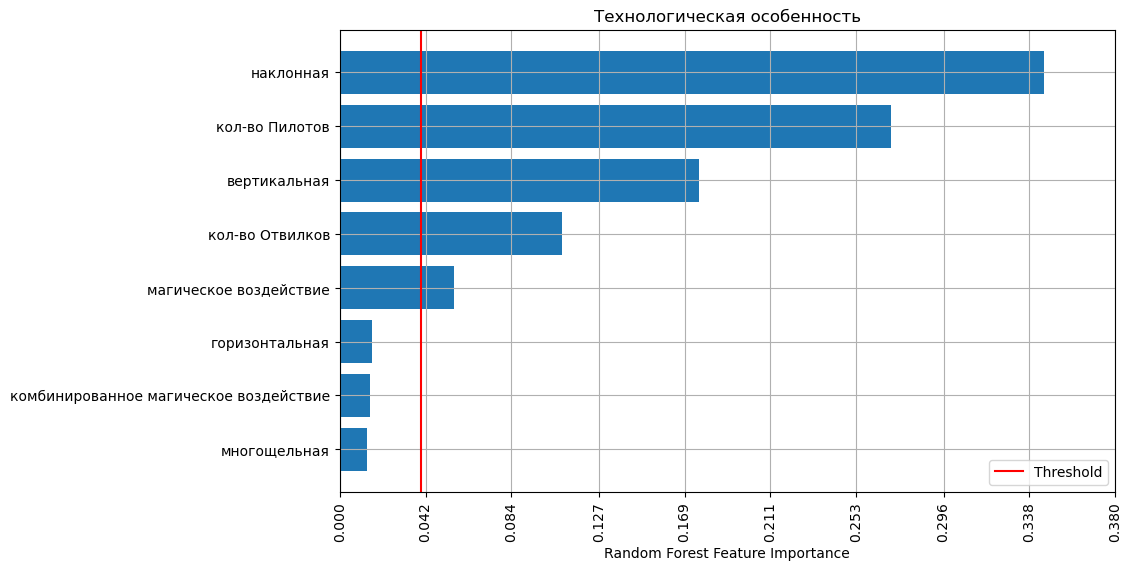

In [101]:
peculiarity=feature_selection(X_peculiarity, y_num, 'Технологическая особенность', n_estimators=100, random_state=42, threshold=0.04, plotting=True)

Итак, самыми информативными признаками, для нас являются вертикальный и наклонный тип скважины, количество пилотов и отвилков, а также магическое воздействие. При этом многощелевая и горизонтальная конструкция расщелины, а также комбинированное магическое воздействие значительно уступают в информативности и не будут включены в модель.

In [102]:
peculiarity[0]

Index(['магическое воздействие', 'кол-во Отвилков', 'вертикальная',
       'кол-во Пилотов', 'наклонная'],
      dtype='object')

In [103]:
X_peculiarity=X_peculiarity[peculiarity[0]]

In [104]:
X_peculiarity.head().T.head(len(peculiarity[1]))

,0,1,2,3,4
магическое воздействие,0.0,0.0,0.0,0.0,0.0
кол-во Отвилков,0.0,40.0,0.0,0.0,0.0
вертикальная,0.0,0.0,0.0,0.0,0.0
кол-во Пилотов,0.0,0.0,0.0,0.0,0.0
наклонная,1.0,0.0,1.0,1.0,1.0


Посмотрим на совстречаемость пилотов и отвилков. 

In [105]:
X_peculiarity.loc[:, ['кол-во Отвилков', 'кол-во Пилотов']].value_counts().reset_index().sort_values(by=['кол-во Пилотов', 'кол-во Отвилков']).T

,0,2,4,6,9,11,14,17,21,18,24,25,27,28,1,5,3,15,8,22,10,7,12,13,19,16,23,20,26
кол-во Отвилков,0.0,40.0,60.0,80.0,120.0,140.0,160.0,180.0,200.0,220.0,240.0,260.0,280.0,340.0,0.0,0.0,40.0,0.0,60.0,0.0,80.0,0.0,120.0,140.0,160.0,180.0,200.0,220.0,260.0
кол-во Пилотов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,40.0,40.0,60.0,60.0,80.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0,260.0
count,9593.0,1177.0,213.0,133.0,63.0,42.0,24.0,5.0,3.0,4.0,1.0,1.0,1.0,1.0,1261.0,143.0,368.0,16.0,108.0,2.0,55.0,122.0,27.0,26.0,4.0,6.0,2.0,4.0,1.0


Мы видим что:
1) Отвилки без пилотов встречаются на всём диапазоне количества отвилков; Там где присутствуют хотя бы одно из этих решений, чаще всего встречаются:
2) 40 отвилков при нулевом количестве пилотов 1177 случаев
3) 20 пилотов без отвилок 1261 случай.
4) Пилоты встречаются и с отвилками и без, но при количествах от 120 до 260 пилотов, им соответствует такое же количество отвилков. Возможно имеет смысл введение трёхклассовой переменной совстречаемости

In [106]:
X_peculiarity.dtypes

магическое воздействие      int64
кол-во Отвилков           float64
вертикальная                int64
кол-во Пилотов            float64
наклонная                   int64
dtype: object

In [107]:
X_peculiarity[['магическое воздействие', 'вертикальная', 'наклонная']]=X_peculiarity[['магическое воздействие', 'вертикальная', 'наклонная']].astype(bool)
X_peculiarity[['кол-во Отвилков', 'кол-во Пилотов']]=X_peculiarity[['кол-во Отвилков', 'кол-во Пилотов']].astype('int16')

C:\Users\User\AppData\Local\Temp\ipykernel_10208\463229743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_peculiarity[['магическое воздействие', 'вертикальная', 'наклонная']]=X_peculiarity[['магическое воздействие', 'вертикальная', 'наклонная']].astype(bool)
C:\Users\User\AppData\Local\Temp\ipykernel_10208\463229743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_peculiarity[['кол-во Отвилков', 'кол-во Пилотов']]=X_peculiarity[['кол-во Отвилков', 'кол-во Пилотов']].astype('int16')


### 4.5 Помощник по поиску            

In [108]:
X_search=df['Помощник по поиску']

In [109]:
X_search=feat_ohe(X_search, word_to_remove='', splitter=';')

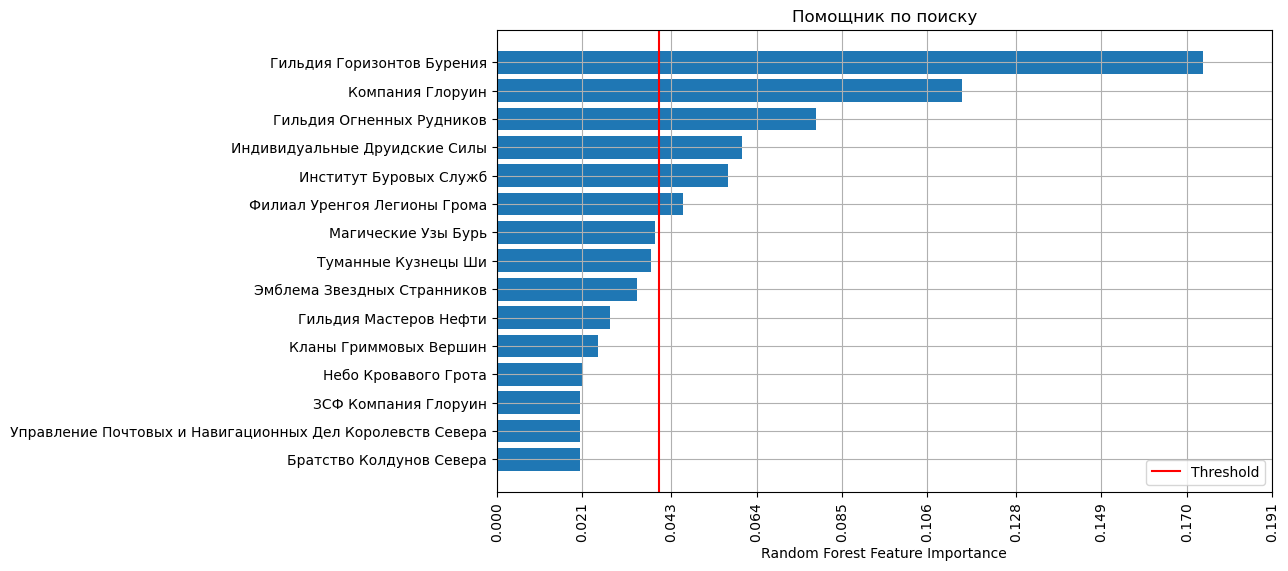

In [110]:
s_t=time.time()
search=feature_selection(X_search, y_num, 'Помощник по поиску', n_estimators=100, random_state=42, threshold=0.04, plotting=True) # Ввиду большого количества проеряемых классов, вывод графика отключён.
e_t=time.time()

In [111]:
X_search.head()

,Орден Азарийских Грёз,Гильдия Небесных Странников,Гильдия Мастеров Нефти,Небо Кровавого Грота,Филиал Уренгоя Легионы Грома,Гильдия Нефтяных Буровых Кузнецов,Туманные Кузнецы Ши,Гильдия Бурения Восточной Европы,Интегральная Гильдия Бурильщиков Руси,Гильдия Огненных Рудников,Братство Колдунов Севера,Гильдия Долговременного Бурения,КФ Компания Глоруин,Управление Почтовых и Навигационных Дел Королевств Севера,Магические Узы Бурь,Индивидуальные Друидские Силы,Искусство Стихийных Служб,Альянс Хранителей Рун,Печать Грозового Рога,Авангард Стихийных Кузниц,Альянс Сервисных Технологий,Вечные Ночные Братства,НФ Авангард Стихийных Кузниц,Неизвестные Легионы,Академия Магических Ковенов Горизонта,Ковен Ветра и Бурения,Легион Речного Короля,...,ТФ Авангард Стихийных Кузниц,Краснолюдский Цех Буровых Технологий,Нафтовый Союз Друидов,ЯФ Авангард Стихийных Кузниц,СФ АО Охотники на Чудовищ,Наследие Громовой Кузницы,Инерция Туманного Очага,Интегральная Мастерская Бурения Руси,ЗСФ Компания Глоруин,Институт Буровых Служб,Кланы Восточных Рудников,Реданская Служба Бурения,Рыцари Магических Техник,Кланы Снежных Альянсов,Кул Рунных Ям,Управление Кланов Татгаров,Бурильщики Забытых Земель,Знаки Оренбургских Зверей,Братство Колдунов Пещер,Вечный Порядок Трав,Маги Стихии,Эмблема Небесных Грёз,Гильдия Исследователей Нефти,Филиал Краснодара Гильдия Пламени,Братство Ночных Снегов,Академия Инвесторов Земель,Кланы Гриммовых Вершин
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
X_search=X_search[search[0]].astype(bool)
X_search.dtypes

Филиал Уренгоя Легионы Грома     bool
Институт Буровых Служб           bool
Индивидуальные Друидские Силы    bool
Гильдия Огненных Рудников        bool
Компания Глоруин                 bool
Гильдия Горизонтов Бурения       bool
dtype: object

### 4.6 Помощник по долбилам   

In [113]:
X_chisel=df['Помощник по долбилам']

In [114]:
X_chisel=feat_ohe(X_chisel, word_to_remove='', splitter=';')

In [115]:
X_chisel.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

Мы обнаружили объектную переменную, посмотрим какиее значения она может принимать

In [116]:
X_chisel.select_dtypes('O').head(3)

,Защитники Проклятых
0,0
1,0
2,1


Итак, это переменная создаваемая из класса "Защитники Проклятых". Посмотрим сколько значений она может принимать.

In [117]:
X_chisel['Защитники Проклятых'].unique()

array([0, 1, 2], dtype=object)

Итак, переменная иногда  встречается дважды! (возможно задвоение при регистрации), либо программный артефакт. Проверяем предрположение.

In [118]:
df.loc[X_chisel['Защитники Проклятых']==2, ['Помощник по долбилам']].values

array([['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['Защитники Проклятых - Урал'],
       ['АО НПП Защитники Проклятых; Защитники Проклятых - Самара'],
       ['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых ЗБС'],
       ['Защитники Проклятых - Урал']], dtype=object)

Мы видим что здесь имеется какой-то артефакт вычисления. Исправляем ошибки 

In [119]:
df.loc[X_chisel['Защитники Проклятых']==2, ['Защитники Проклятых']]=1

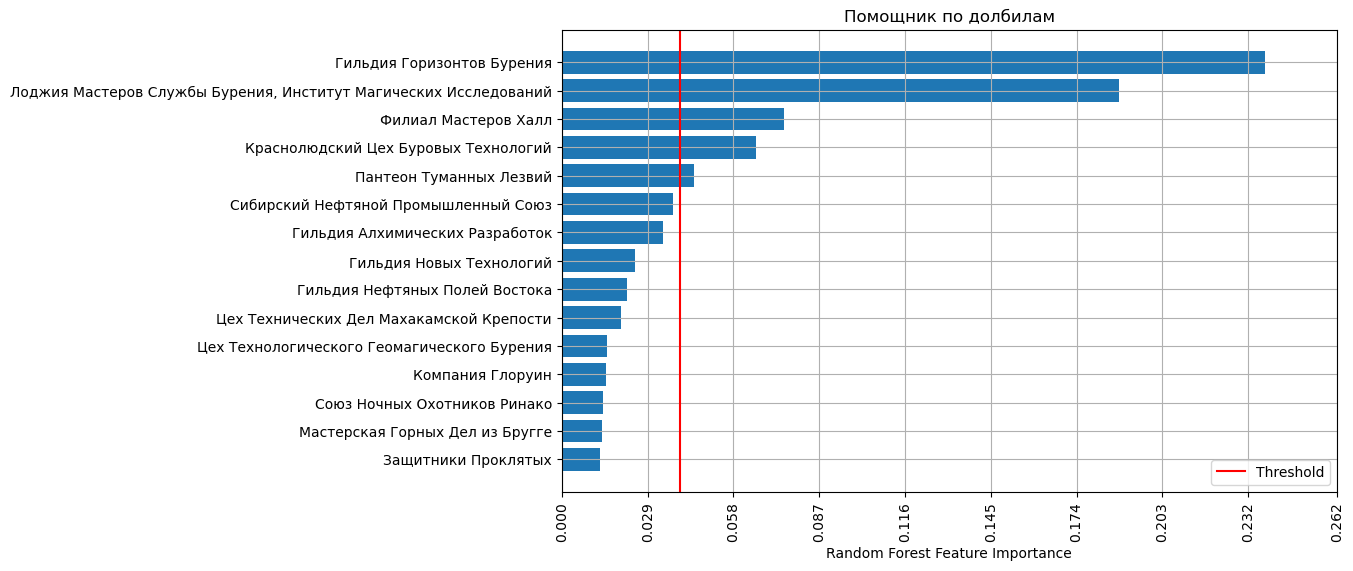

In [120]:
chisel=feature_selection(X_chisel, y_num, 'Помощник по долбилам', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [121]:
X_chisel[chisel[0]].dtypes.unique()

array([dtype('int64')], dtype=object)

In [122]:
X_chisel=X_chisel[chisel[0]].astype(bool)
X_chisel

,Пантеон Туманных Лезвий,Краснолюдский Цех Буровых Технологий,Филиал Мастеров Халл,"Лоджия Мастеров Службы Бурения, Институт Магических Исследований",Гильдия Горизонтов Бурения
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
13411,False,True,False,False,False
13412,False,True,False,False,False
13413,False,False,False,False,False
13414,False,True,False,False,False


### 4.6 Помощник по подвескам    

In [123]:
X_susp=df['Помощник по подвескам']

In [124]:
X_susp.head()

0     
1     
2     
3     
4     
Name: Помощник по подвескам, dtype: object

In [125]:
X_susp=feat_ohe(X_susp, word_to_remove='', splitter=';|,')
X_susp.head()

,Магическая Лаборатория Решений,Гильдия Нефтяных Буровых Кузнецов,Туманные Кузнецы Ши,Цех Специального Промышленного Оборудования,Гильдия Инженеров Петро,Гильдия Завершения Работ,Гильдия Нефтяных Полей Востока,Цех Технических Дел Махакамской Крепости,Альянс Зенитных Мастеров,Индивидуальные Друидские Силы,Гильдия Подъемных Нефтяных Машин,АО Ноябрьские Мудрецы,Защитники Проклятых ЗБС,Гильдия Сервиса Стихий,Гильдия Сервисных РаботТЭК-Бурение,Служба Контроля Природных Недр,Ковен Ветра и Бурения,Цех Тяжелых Пресс-машин,Лоджия Мастеров Службы Бурения,Центральный Сервис Мастеров Северного Бурения,Научное Зелье,Гильдия Инженерных Систем Тота,Цех Инженерных Изобретений Оксенфурта,Гильдия Сервисных Работ,Академия Северных Племён Хранителей,Цех Ремесленников Газпрома,Мастерская Сибирских Бурильных Машин,...,Научный Центр Земных Ресурсов,Мастерская Внедрения Нефтяных Машин Туссента,Цех Магов Брендов,Институт Магических Исследований,Ассоциация Долгосрочных Лицензионных Работ,Технический Альянс Петра,Альянс Мастеров Сервиса,Краснолюдский Цех Буровых Технологий,Торговый Союз Сервисов,Фонд Ковенов Бурения,Торговый Дом Тяжелых Машин,Союз Пакеров Буровых Работ,Филиал Мастеров Халл,Кланы Восточных Рудников,Мастерская Оружия для Нефтяных Полей,Цех Мастеров Динамического Бурения,Альянс Волги Динамического Бурения,Мастерская Зенитного Колеса Новиграда,Механизированный Альянс по Добыче Минерального Масла,Холдинг Татаградских Промышленных Работ,Технический Союз Сервисов,Цех Кузнецов Тёмного Камня,Гильдия Сервисных Работная Компания ПоискНефтеГаз,Цех Северных Буровых Машин,Лоджия Магов Бурильных Работ,Альянс Утренней Звезды,Гильдия Контроля Нефти
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


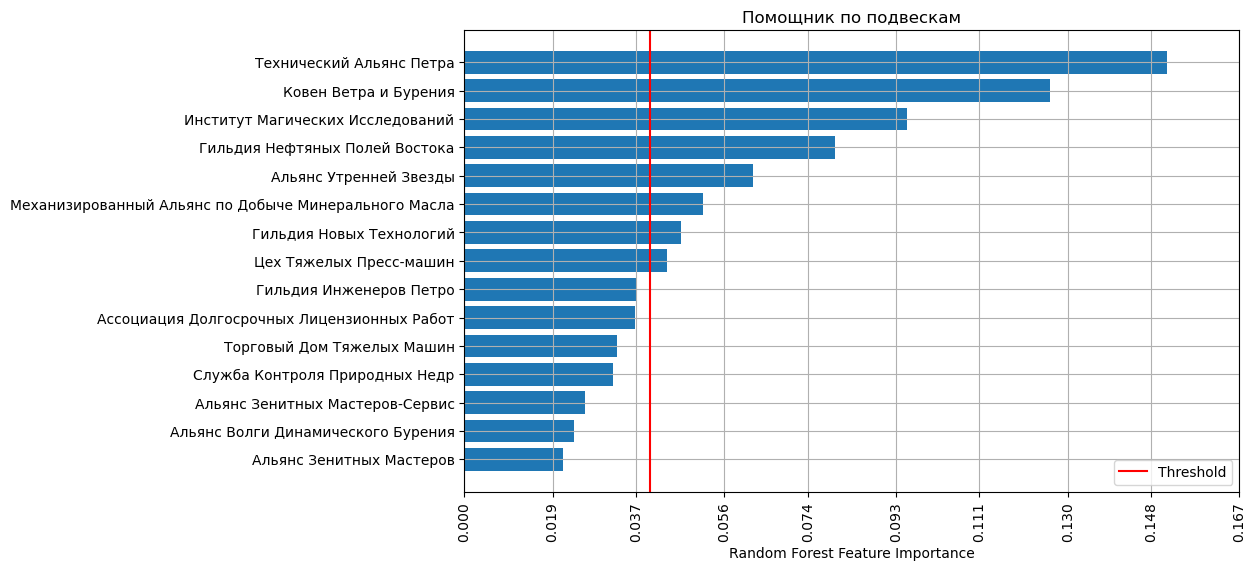

In [126]:
susp=feature_selection(X_susp, y_num, 'Помощник по подвескам', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [127]:
X_susp=X_susp[susp[0]].astype(bool)

In [128]:
X_susp.dtypes

Цех Тяжелых Пресс-машин                                 bool
Гильдия Новых Технологий                                bool
Механизированный Альянс по Добыче Минерального Масла    bool
Альянс Утренней Звезды                                  bool
Гильдия Нефтяных Полей Востока                          bool
Институт Магических Исследований                        bool
Ковен Ветра и Бурения                                   bool
Технический Альянс Петра                                bool
dtype: object

### 4.7 Участки

Посмотрим как выглядят записи по данному признаку

In [129]:
X_sites=df['Участки']
X_sites.head().values

array(['верхнее укрепление+среднее укрепление+основное укрепление',
       'верхнее укрепление+среднее укрепление+основное укрепление+тупик',
       'верхнее укрепление+среднее укрепление+основное укрепление',
       'верхнее укрепление+среднее укрепление+основное укрепление',
       'верхнее укрепление+среднее укрепление+основное укрепление'],
      dtype=object)

Разделяем, смотрим:

In [130]:
X_sites=feat_ohe(X_sites, word_to_remove='укрепление', splitter='+') # Используем разделитель '+', а также удаляем слово укрепление.

In [131]:
X_sites.dtypes

среднее среднее        int64
пилот                  int64
тупик                  int64
открытая расщелина     int64
среднее               object
верхнее                int64
изоляция               int64
основное               int64
dtype: object

Программа неплохо отработала на разделение, но выдала две строки по средним, причём одну из них в объектном формате

In [132]:
X_sites.columns

Index(['среднее среднее', 'пилот', 'тупик', 'открытая расщелина', 'среднее',
       'верхнее', 'изоляция', 'основное'],
      dtype='object')

Данные пееменные фиксируют наличие/отсутствие того или иного элемента конструкции, но не считают их количество, и признак "среднее" ухватил это количество случайно

In [133]:
X_sites['среднее']=X_sites['среднее'].astype('int8')

In [134]:
a=X_sites.copy()

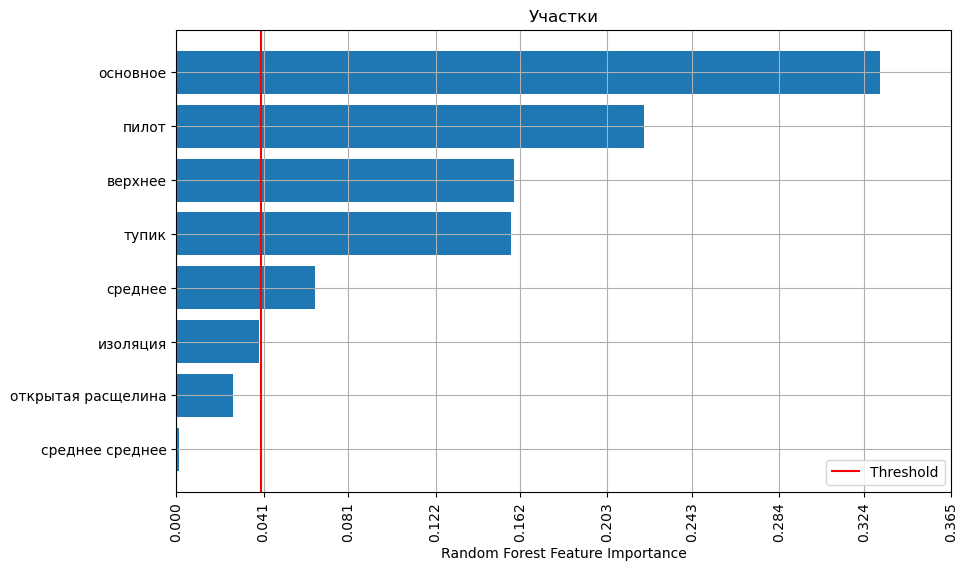

In [135]:
sites=feature_selection(X_sites, y_num, 'Участки', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

Убираем класс "изоляция" и "открытая расщелина", а также двойное сочетание "среднее укрепление- среднее укрепление"

In [136]:
X_sites['среднее'].unique()

array([1, 0, 2, 3], dtype=int8)

Как мы видим, здесь тоже похоже имеется баг...

In [137]:
df.loc[X_sites['среднее']>1, ['Участки']].values

array([['верхнее укрепление+среднее укрепление+среднее укрепление+основное укрепление'],
       ['верхнее укрепление+верхнее укрепление+среднее укрепление+среднее укрепление+основное укрепление+основное укрепление+тупик'],
       ['верхнее укрепление+среднее укрепление+среднее укрепление+основное укрепление'],
       ['среднее укрепление+среднее укреплениесреднее укрепление'],
       ['среднее укреплениесреднее укрепление'],
       ['среднее укрепление+среднее укреплениесреднее укрепление'],
       ['среднее укрепление+среднее укреплениесреднее укрепление'],
       ['среднее укреплениесреднее укрепление+тупик'],
       ['верхнее укрепление+среднее укрепление+среднее укреплениесреднее укрепление+тупик'],
       ['среднее укрепление+среднее укреплениесреднее укрепление'],
       ['среднее укрепление+среднее укреплениесреднее укрепление']],
      dtype=object)

Нет, мы зря грешили на функцию, она поймала несколько средник укреплений и сообщило о них. 

In [138]:
X_sites['среднее']=X_sites['среднее'].astype('int8')

In [139]:
X_sites=X_sites[sites[0]]

In [140]:
X_sites.columns

Index(['среднее', 'тупик', 'верхнее', 'пилот', 'основное'], dtype='object')

In [141]:
# df['среднее укрепление']=df['среднее укрепление'].

Попробуем использовать чуть более совершенный счётчик вхождений наших слов

In [142]:
import re
def count_occurrences(s, phrase):
    pattern = re.compile(r'(?<!\w)(' + re.escape(phrase) + r')(?!\w)', re.IGNORECASE)
    matches = pattern.findall(s)
    return len(matches)
    
s=df['Участки']
phrase = "верхнее укрепление"

In [143]:
# df.iloc[list(set(reinf_kinds_sum_df.index).difference(df['Участки'].index))]

In [144]:
reinf_kinds_sum=dict()
for kind in ['основное', 'пилот', 'тупик', 'верхнее', 'среднее', 'изоляция', 'открытая расщелина']:
    occur=df['Участки'].apply(lambda x: count_occurrences(x, kind))
    reinf_kinds_sum[kind]=occur
    
reinf_kinds_sum_df=pd.DataFrame(reinf_kinds_sum)

В дополнение к параметрам введёим ещё один признак их сумму ('sum_site')

In [145]:
reinf_kinds_sum_df['sum_site']=reinf_kinds_sum_df.sum(axis=1)

In [146]:
pd.concat([reinf_kinds_sum_df, df['Участки']], axis=1).head(10) # Проверяем

,основное,пилот,тупик,верхнее,среднее,изоляция,открытая расщелина,sum_site,Участки
0,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...
1,1,0,1,1,1,0,0,4,верхнее укрепление+среднее укрепление+основное...
2,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...
3,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...
4,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...
5,0,0,1,0,0,0,0,1,тупик
6,0,0,0,1,1,0,0,2,верхнее укрепление+среднее укрепление
7,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...
8,1,0,1,1,1,0,0,4,верхнее укрепление+среднее укрепление+основное...
9,1,0,0,1,1,0,0,3,верхнее укрепление+среднее укрепление+основное...


In [147]:
b=reinf_kinds_sum_df.copy()

Проверяем данные на важность, здесь у нас тоже дела обстоят неплохо

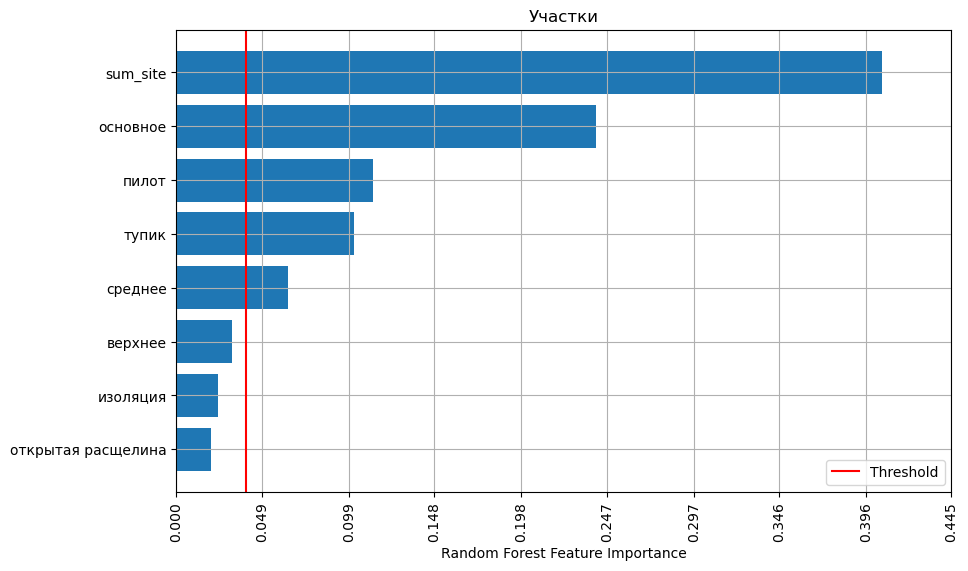

In [148]:
sites_num=feature_selection(reinf_kinds_sum_df, y_num, 'Участки', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [149]:
reinf_kinds_sum_df

,основное,пилот,тупик,верхнее,среднее,изоляция,открытая расщелина,sum_site
0,1,0,0,1,1,0,0,3
1,1,0,1,1,1,0,0,4
2,1,0,0,1,1,0,0,3
3,1,0,0,1,1,0,0,3
4,1,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...
13411,0,0,1,0,0,0,0,1
13412,0,0,0,0,0,0,0,0
13413,1,0,0,0,1,0,0,2
13414,0,0,1,0,0,0,0,1


In [150]:
reinf_kinds_sum_df=reinf_kinds_sum_df[sites_num[0]]

In [151]:
reinf_kinds_sum_df

,среднее,тупик,пилот,основное,sum_site
0,1,0,0,1,3
1,1,1,0,1,4
2,1,0,0,1,3
3,1,0,0,1,3
4,1,0,0,1,3
...,...,...,...,...,...
13411,0,1,0,0,1
13412,0,0,0,0,0
13413,1,0,0,1,2
13414,0,1,0,0,1


Посмотрим как соотносятся между собой данные полученные обеими функциями (feat_ohe и count_occurrences)

In [152]:
rks=reinf_kinds_sum_df[reinf_kinds_sum_df>0].mean()
xs=X_sites[X_sites>0].mean()
site_counts_means=pd.DataFrame([rks, xs])
site_counts_means.index=['count_occurrences', 'feat_ohe']
site_counts_means

,среднее,тупик,пилот,основное,sum_site,верхнее
count_occurrences,1.000988,1.019619,1.000527,1.001166,2.920823,NaN
feat_ohe,1.001866,1.019619,1.000527,1.001166,NaN,1.000568


In [153]:
z=pd.concat([df['Участки'], a['верхнее'], b['верхнее']], axis=1)
z[z.iloc[:, 1]!=z.iloc[:, 2]]

,Участки,верхнее,верхнее


Как мы видим функции подсчёта дают одинаковые среднеарифметическин количества встречаемости укреплений, но признак количества "Верхних укреплений",  полученных с помощью  функции подсчёта reinf_kinds_sum не проходит отбора в качестве важного. Поскольку этот признак уже присутствует как составляющая признака sum_site, выберем данные полученные при использовании функции rks (датафрейм reinf_kinds_sum_df.  В дальнейшем необходимо детально проанализировать причины расхождений, но пока мы выбираем count_occurrences как более консервативную оценку.

### 4.8 Помощник по контролю поиска  

In [154]:
X_srch_ctrl=df['Помощник по контролю поиска']

In [155]:
X_srch_ctrl = feat_ohe(X_srch_ctrl, word_to_remove='', splitter=';') 

C:\Users\User\AppData\Local\Temp\ipykernel_10208\2692826716.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)


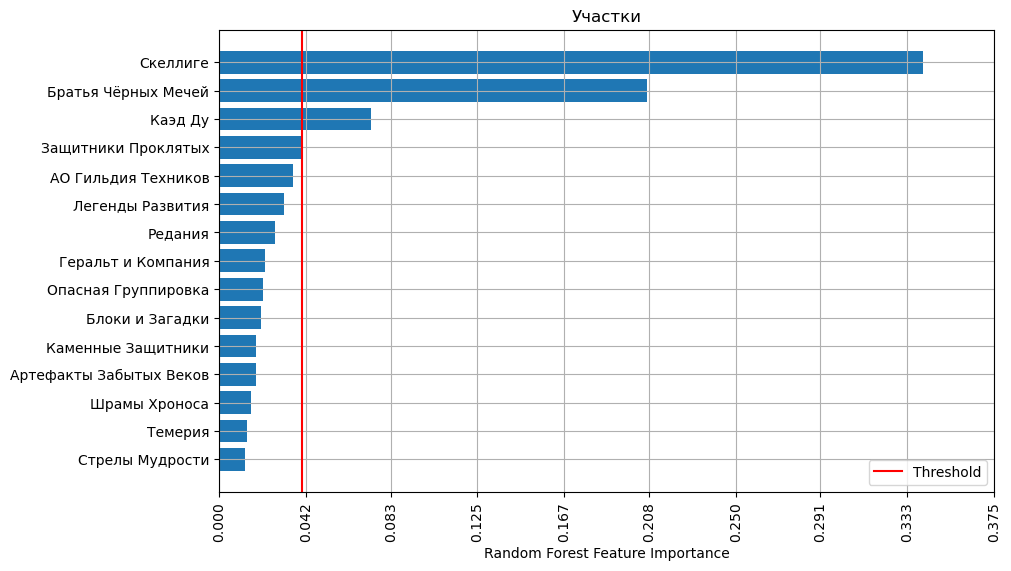

In [156]:
srch_ctrl=feature_selection(X_srch_ctrl, y_num, 'Участки', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [157]:
srch_ctrl

(Index(['Защитники Проклятых', 'Каэд Ду', 'Братья Чёрных Мечей', 'Скеллиге'], dtype='object'),
 0.040799    Защитники Проклятых
 0.073654                Каэд Ду
 0.207145    Братья Чёрных Мечей
 0.340664               Скеллиге
 dtype: object)

In [158]:
X_srch_ctrl=X_srch_ctrl[srch_ctrl[0]]

### 4.9 Помощник по зельям 

In [159]:
X_potions=df['Помощник по зельям']

In [160]:
X_potions = feat_ohe(X_potions, word_to_remove='', splitter=';|,') 
X_potions

C:\Users\User\AppData\Local\Temp\ipykernel_10208\2692826716.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)


,Небо Кровавого Грота,Гильдия Нефтяных Буровых Кузнецов,Туманные Кузнецы Ши,Гильдия Инженеров Петро,Союз Бурильщиков Петра,Гильдия Мастеров Кемали,Гильдия Современных Решений,Цех Технических Дел Махакамской Крепости,Специальная Служба Петра,Гильдия Сервисных Работ Буровых Растворов,Гильдия Долговременного Бурения,Гильдия Сервисных Работный центр СБМ,АО Золотая Орда,Индивидуальные Друидские Силы,Альянс Хранителей Рун,Печать Грозового Рога,Авангард Стихийных Кузниц,Альянс Сервисных Технологий,Навигационная Гильдия Мастеров Пути,Гильдия Сервисных РаботТЭК-Бурение,Академия Магических Ковенов Горизонта,Лоджия Мастеров Службы Бурения,Гильдия Горизонтов Бурения,Центральный Сервис Мастеров Северного Бурения,Гильдия Современных Сервисных Решений,Научно-Исследовательский Центр Энергетических Ресурсов,Цех Инженерных Изобретений Оксенфурта,Магия Глубинных Оков,Академия Северных Племён Хранителей,Цех Специального Оборудования,Гильдия Химических Бурильных Сервисов,Гильдия Сервисов Кортекса,Гильдия Исследователей Аргоса,Институт Магических Исследований,Научно-Исследовательский Центр Нефтегазовых Технологий,Компания Глоруин,Цех Инновационных Сервисов,Нордский Союз Конструкторов,Защитники Проклятых,Краснолюдский Цех Буровых Технологий,ТФ Авангард Стихийных Кузниц,Фонд Ковенов Бурения,Академия Северных Племён Хранителей-БР,Петровский Альянс Бурильщиков,Альянс Мудрецов и Травников Нильфгаарда,Управление Нефтяной Промышленности,Филиал Мастеров Халл,Цех Атоллов по Бурению,Цех Прогрессивных Буровых Технологий,Фонд Службы Бурения ПетроАльянс,Гильдия Технологических Новшеств,Ф ССК-Т Авангард Стихийных Кузниц,Товарищество Мистических Нефтяных Гротов,Специальная Служба Петра (ООО СПС)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
13412,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
13413,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
13414,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


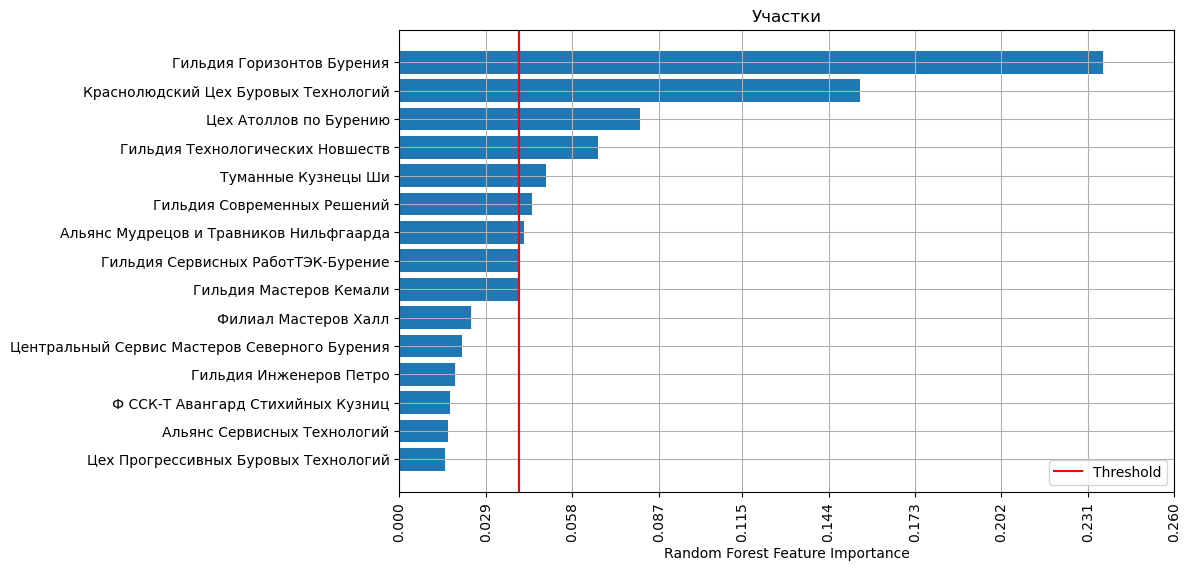

In [161]:
potions=feature_selection(X_potions, y_num, 'Участки', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [162]:
X_potions=X_potions[potions[0]]

In [163]:
X_potions.head().T.head(len(potions[0]))

,0,1,2,3,4
Гильдия Сервисных РаботТЭК-Бурение,0,0,0,0,0
Альянс Мудрецов и Травников Нильфгаарда,0,1,0,0,0
Гильдия Современных Решений,0,0,0,0,0
Туманные Кузнецы Ши,0,0,0,0,1
Гильдия Технологических Новшеств,0,0,0,0,0
Цех Атоллов по Бурению,0,0,0,0,0
Краснолюдский Цех Буровых Технологий,1,0,1,1,0
Гильдия Горизонтов Бурения,0,0,0,0,0


### 4.10 Помощник по исследованиям   

In [164]:
X_rsrch=df['Помощник по исследованиям']

In [165]:
X_rsrch

0        Гильдия Временных Исследований
1                                Стихия
2                                      
3                                      
4                                      
                      ...              
13411      Цех Прогрессивных Технологий
13412      Гильдия Геосервисов и Помощи
13413             АО Ноябрьские Мудрецы
13414    Гильдия Временных Исследований
13415                            Стихия
Name: Помощник по исследованиям, Length: 13406, dtype: object

In [166]:
X_rsrch=feat_ohe(X_rsrch, word_to_remove='', splitter=';|,')

C:\Users\User\AppData\Local\Temp\ipykernel_10208\2692826716.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)


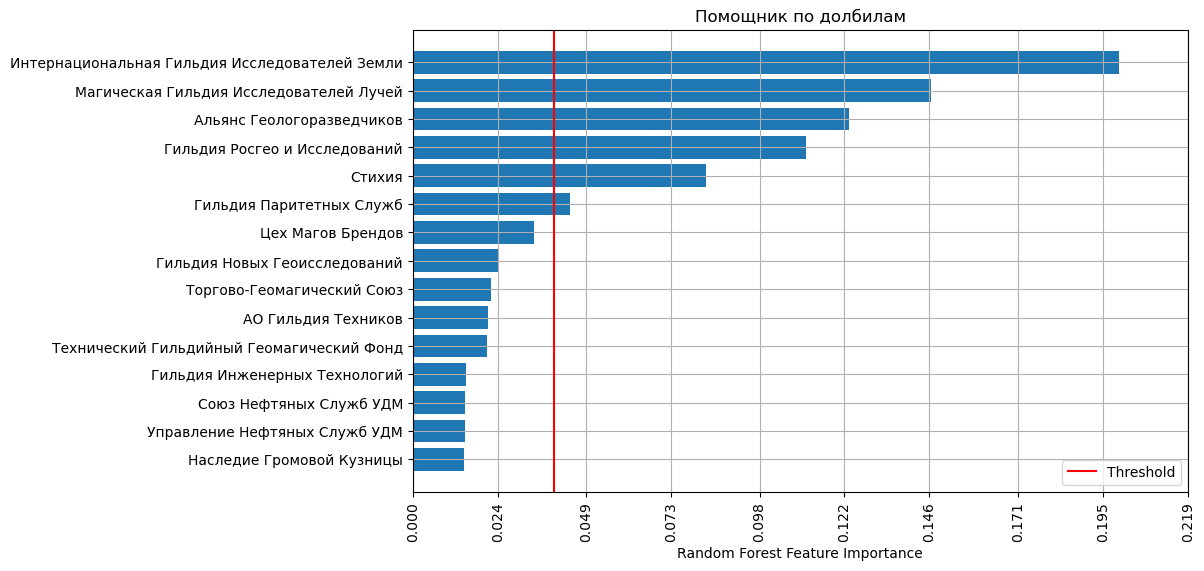

In [167]:
rsrch=feature_selection(X_rsrch, y_num, 'Помощник по долбилам', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [168]:
X_rsrch=X_rsrch[rsrch[0]]


In [169]:
# X_chisel=X_chisel[chisel[0]]
# X_chisel

In [170]:
df.columns

Index(['Наименование земли', 'Наименование хребта', 'Наименование расщелины',
       'Цель', 'Тип расщелины', 'Категория расщелины', 'Назначение расщелины',
       'Участки', 'Тип отвилка', 'Технологическая особенность',
       'Статус поиска', 'Помощник по контролю поиска', 'Помощник по поиску',
       'Помощник по наклонным расщелинам', 'Помощник по зельям',
       'Помощник по долбилам', 'Помощник по исследованиям',
       'Помощник по укреплению', 'Помощник по огненным заклятиям',
       'Помощник по подвескам', 'Помощник по вырезке окна', 'Тип инструмента',
       'Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев 

### 4.11 Помощник по огненным заклятиям 

In [171]:
100*df['Помощник по огненным заклятиям'].value_counts(normalize=True).round(3)      

Помощник по огненным заклятиям
Гильдия Нефтяных  Газпрома                                         47.3
                                                                   39.4
Палата Нефтяных Геомагов Фольтеста                                  4.0
Промышленная Гильдия Земляных Магов Тимерии                         2.2
Технический Гильдийный Геомагический Фонд                           1.5
                                                                   ... 
Защитники Проклятых ЗБС; Гильдия Нефтяных  Газпрома                 0.0
Гильдия Геофизических Служб; Палата Нефтяных Геомагов Фольтеста     0.0
Защитники Проклятых ЗБС                                             0.0
Гильдия Нефтяных  Газпрома; Гильдия Нефтяной Геофизики Самары       0.0
Гильдия Нефтяных  Газпрома; Гильдия Временных Исследований          0.0
Name: proportion, Length: 80, dtype: float64

In [172]:
X_firespell=df['Помощник по огненным заклятиям']

In [173]:
X_firespell=feat_ohe(X_firespell, word_to_remove='', splitter=';|,') 

C:\Users\User\AppData\Local\Temp\ipykernel_10208\2692826716.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)


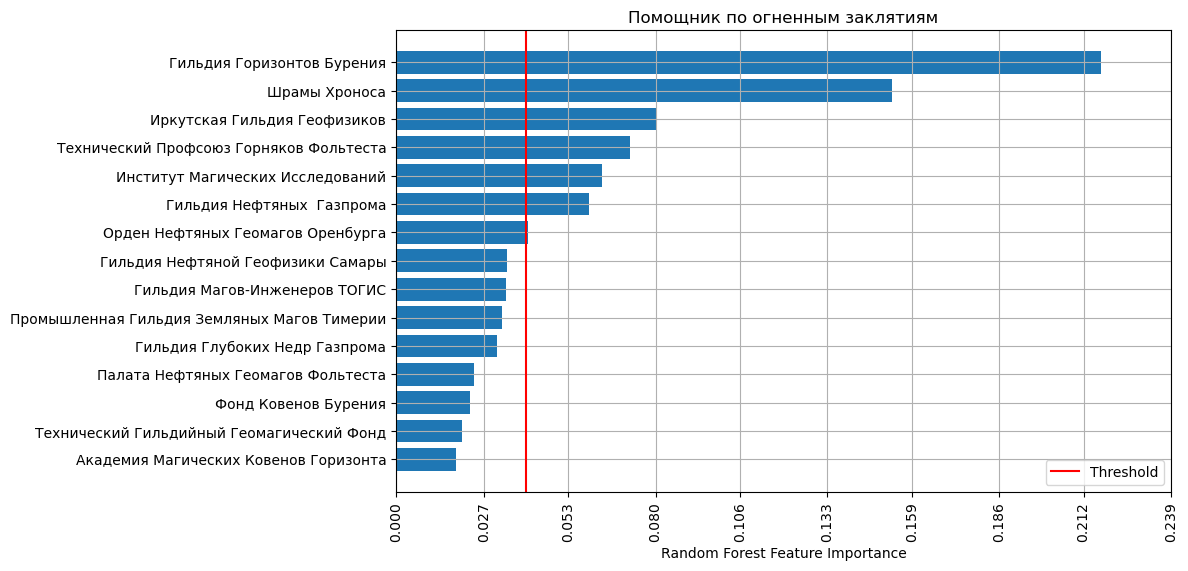

In [174]:
firespell=feature_selection(X_firespell, y_num, 'Помощник по огненным заклятиям', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

In [175]:
X_firespell=X_firespell[firespell[0]]

У нас мизерное количество записей содержащих информацию по признаку 'Тип инструмента', и его рассмотрение бессмысленно, удаляем этот признак

In [176]:
df.drop(columns='Тип инструмента', inplace=True)

### 4.12 Помощник по вырезке окна      

In [177]:
X_wnd_cut=df['Помощник по вырезке окна']

In [178]:
X_wnd_cut=feat_ohe(X_wnd_cut, word_to_remove='', splitter=';|,')

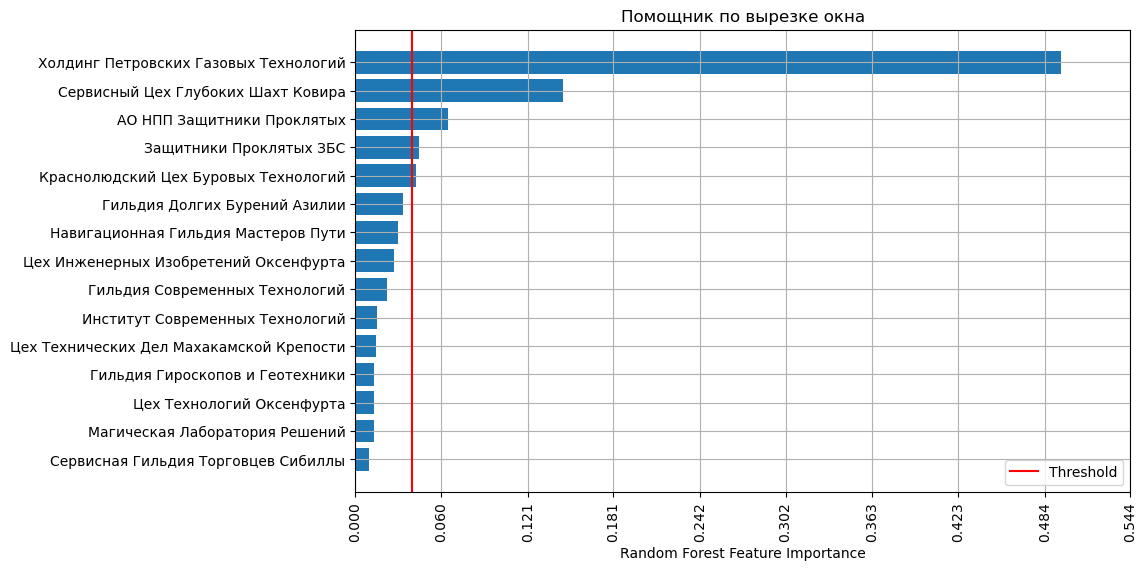

In [179]:
wnd_cut=feature_selection(X_wnd_cut, y_num, 'Помощник по вырезке окна', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

Мы наблюдаем крайне высокую важность Класса 'Холдинг Петровских Газовых Технологий'

In [180]:
X_wnd_cut=X_wnd_cut[wnd_cut[0]]

### 4.13 Тип отвилка            

In [181]:
X_fork=df['Тип отвилка']

In [182]:
X_fork=feat_ohe(X_fork, word_to_remove='', splitter=';')
X_fork

,Пилотный,Боковой,Дополнительный,Материнский
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13411,0,1,0,0
13412,0,0,0,1
13413,0,0,1,1
13414,0,1,0,0


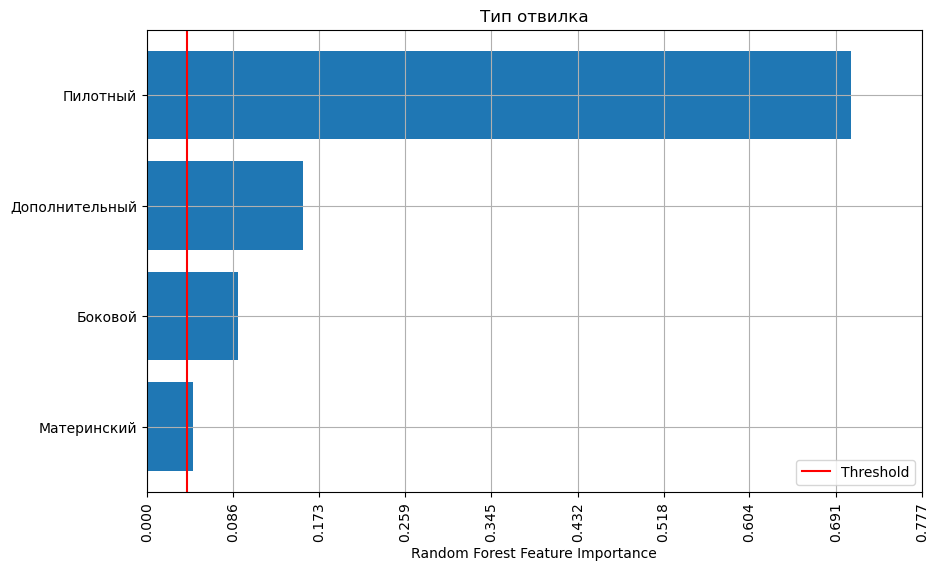

In [183]:
fork=feature_selection(X_fork, y_num, 'Тип отвилка', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

Практически в первый раз, мы не имеем отсева классов, забираем признаки в том виде как они есть 

In [184]:
# X_fork=X_fork

### 4.14 Категория расщелины             

In [185]:
X_cat=df['Категория расщелины']

In [186]:
X_cat=pd.get_dummies(X_cat)

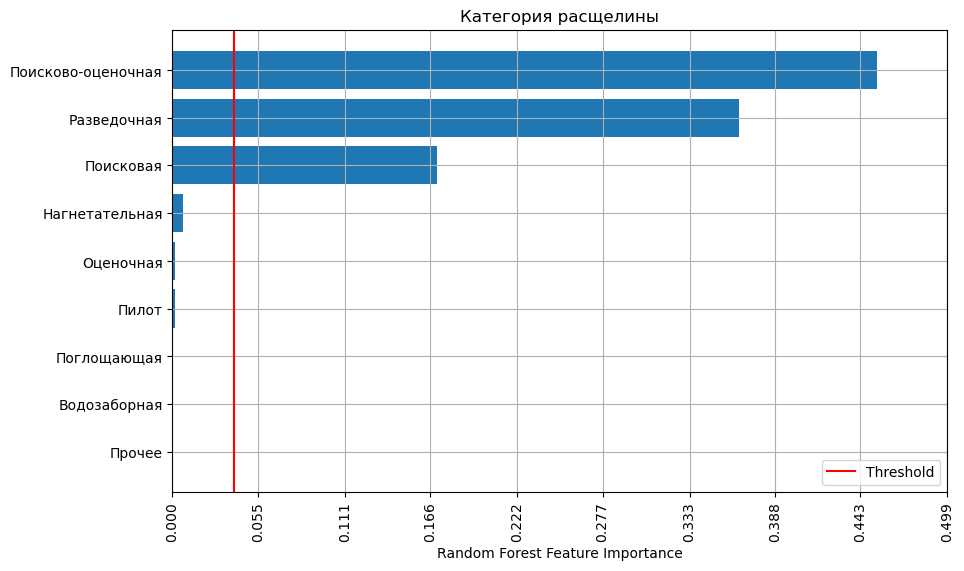

In [187]:
cat=feature_selection(X_cat, y_num, 'Категория расщелины', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 

Из всех скважин, информативными оказались только поисково-оценочная, разведочная и поисковая расщелины, их мы и оставляем.

In [188]:
X_cat=X_cat[cat[0]]
X_cat

,Поисковая,Разведочная,Поисково-оценочная
0,False,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,False
...,...,...,...
13411,True,False,False
13412,True,False,False
13413,True,False,False
13414,True,False,False


### 4.15 Назначение расщелины          

In [189]:
X_purp=df['Назначение расщелины']

In [190]:
X_purp=pd.get_dummies(X_purp)

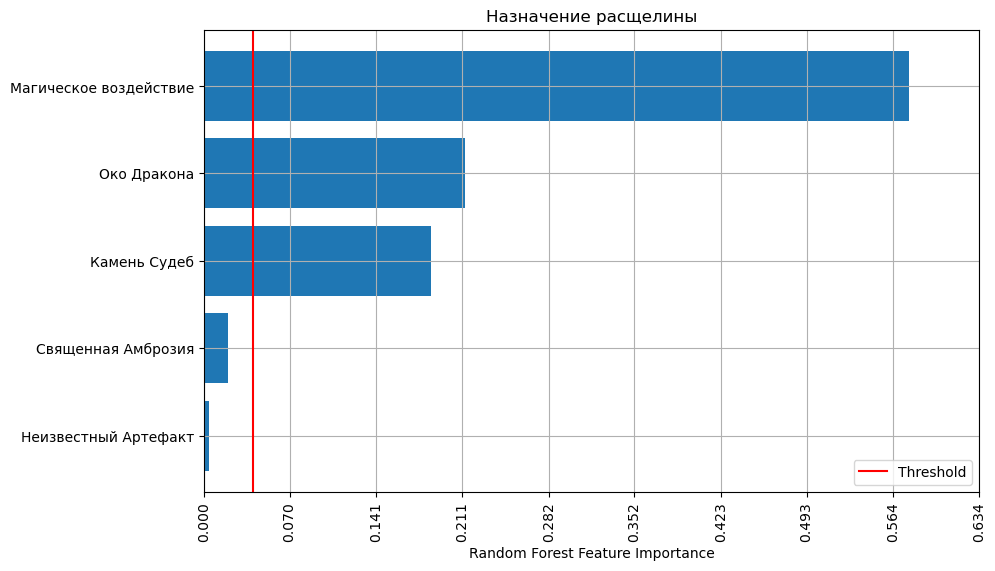

In [191]:
purp=feature_selection(X_purp, y_num, 'Назначение расщелины', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 
X_purp=X_purp[purp[0]]

### 4.16 Тип расщелины             

In [192]:
display(df['Тип расщелины'].value_counts(dropna=False, normalize=True).round(4)*100)

Тип расщелины
горизонтальная    68.13
наклонная         21.12
многощельная       9.64
вертикальная       1.08
NaN                0.01
Name: proportion, dtype: float64

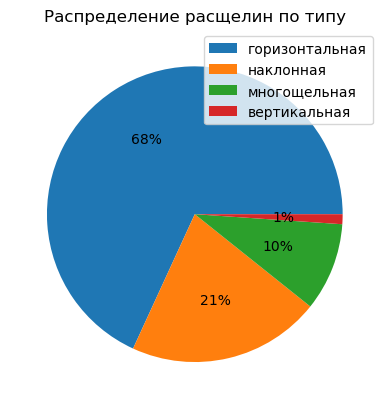

In [193]:
cleftype=df['Тип расщелины'].value_counts(normalize=True)

plt.pie(cleftype, autopct='%1.0f%%')
plt.title('Распределение расщелин по типу')
plt.legend(cleftype.index, loc='upper right')
plt.show()

In [194]:
X_type=df['Тип расщелины']

In [195]:
X_type=pd.get_dummies(X_type)

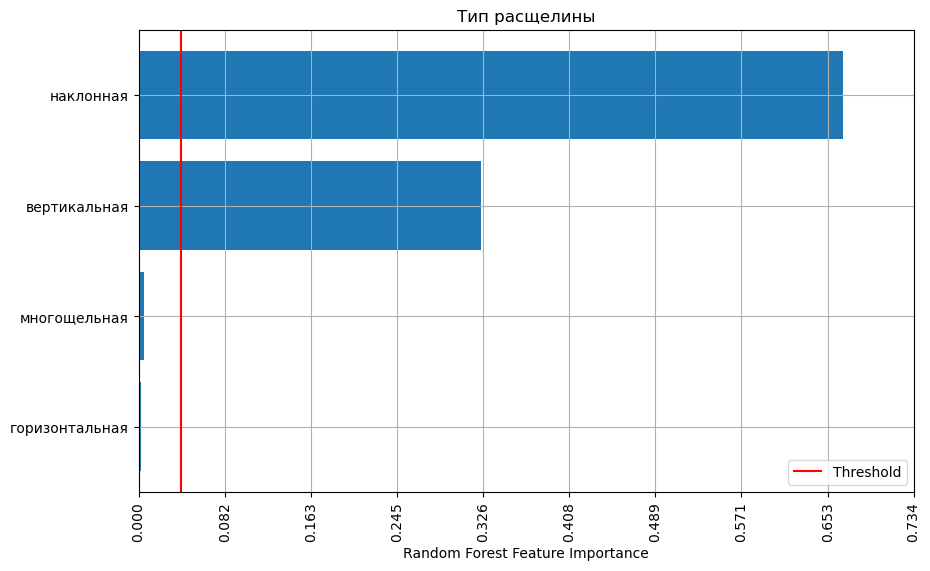

In [196]:
types=feature_selection(X_type, y_num, 'Тип расщелины', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 
X_type=X_type[types[0]]

Мы снова видим типы расщелины, на этот раз всего два информативных типа: наклонный и вертикальный. 

In [197]:
X_type=X_type[types[0]]

### 4.17 Цель                 

In [198]:
display(df['Цель'].value_counts(dropna=False, normalize=True).round(4)*100)

Цель
поиск              74.39
боковой отвилок    24.41
разведка            1.19
Name: proportion, dtype: float64

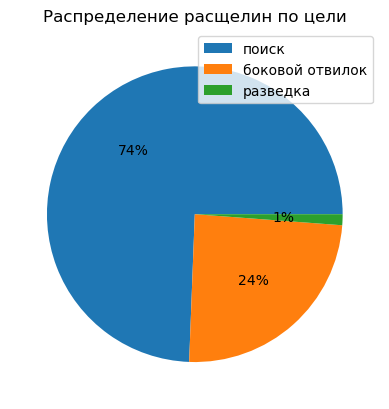

In [199]:
cleftype=df['Цель'].value_counts(normalize=True)

plt.pie(cleftype, autopct='%1.0f%%')
plt.title('Распределение расщелин по цели')
plt.legend(cleftype.index, loc='upper right')
plt.show()

In [200]:
X_aim=pd.get_dummies(df['Цель'])

In [201]:
df['Цель']

0                  поиск
1                  поиск
2                  поиск
3                  поиск
4                  поиск
              ...       
13411    боковой отвилок
13412              поиск
13413              поиск
13414    боковой отвилок
13415              поиск
Name: Цель, Length: 13406, dtype: object

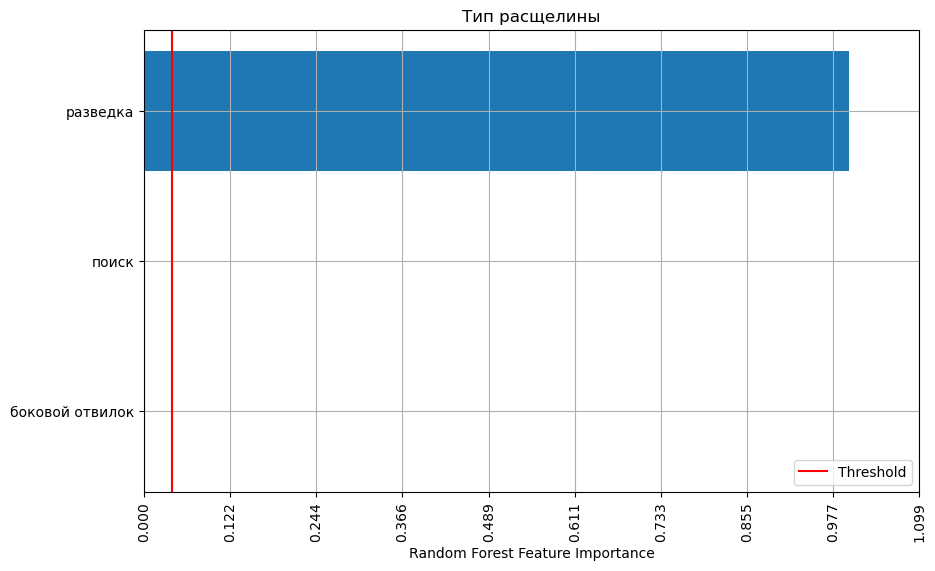

,разведка
0,False
1,False
2,False
3,False
4,False
...,...
13411,False
13412,False
13413,False
13414,False


In [202]:
aim=feature_selection(X_aim, y_num, 'Тип расщелины', n_estimators=100, random_state=42, threshold=0.04, plotting=True) 
X_aim=X_aim[aim[0]]
X_aim


Это парадоксально, но зеачимым оказывается только класс "разведка"

#### 4.18 Статус поиска  (рассмотрен ранее в п. 1)                      

In [203]:
X_num

,Наименование расщелины,Глубина по отвилку,Количество ремонтов,Общий путь поиска,Количество простоев в поиске
0,2903,2889.000000,3.600000,2889.000000,3.600000
1,1332,3474.000000,24.299999,5620.500000,0.000000
2,1027,2596.500000,3.600000,2600.100098,6.300000
3,4208,2699.100098,0.000000,2699.100098,3.600000
4,9352,3193.199951,5.400000,3195.000000,7.200000
...,...,...,...,...,...
13411,3806,NaN,0.000000,985.500000,0.900000
13412,5419,NaN,7.200000,4342.500000,9.000000
13413,5309,NaN,NaN,4345.200195,NaN
13414,5515,NaN,NaN,1262.699951,NaN


# 5 Сборка датасета из претендентов

In [204]:
a=[X_num, X_aim, X_cat, X_chisel, X_fork, X_lands, X_peculiarity, X_potions, X_purp, X_reinf, X_ridges, X_rsrch, X_search, X_srch_ctrl, X_sites, X_slp_clft, X_susp, X_type, X_wnd_cut].copy()


In [205]:
names=['X_num', 'X_aim', 'X_cat', 'X_chisel', 'X_fork', 'X_lands', 'X_peculiarity', 'X_potions', 'X_purp', 'X_reinf', 'X_ridges', 'X_rsrch', 'X_search',' X_srch_ctrl', 'X_sites', 'X_slp_clft', 'X_susp', 'X_type', 'X_wnd_cut']
frames=[X_num, X_aim, X_cat, X_chisel, X_fork, X_lands, X_peculiarity, X_potions, X_purp, X_reinf, X_ridges, X_rsrch, X_search, X_srch_ctrl, X_sites, X_slp_clft, X_susp, X_type, X_wnd_cut]

nameframe=dict(zip(names, frames))

Рассмотрим несколько стратегий борьбы с пропущенными значениями

In [207]:

# def add_dataframe_name_to_columns(df, dataframe_name):
#     df.columns = [f'{col}_{dataframe_name}' for col in df.columns]
#     return df

    

In [208]:
X_cat

,Поисковая,Разведочная,Поисково-оценочная
0,False,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,False
...,...,...,...
13411,True,False,False
13412,True,False,False
13413,True,False,False
13414,True,False,False


In [ ]:
# for n, f in zip(names, frames):
#     print(n, f.columns)

In [210]:
for num, [fr, nm]  in enumerate(zip(frames, names)):
    frames[num]=add_dataframe_name_to_columns(fr, nm)
    
    # add_dataframe_name_to_columns(fr, nm)
frames[6]

In [211]:
X_num, X_aim, X_cat, X_chisel, X_fork, X_lands, X_peculiarity, X_potions, X_purp, X_reinf, X_ridges, X_rsrch, X_search, X_srch_ctrl, X_sites, X_slp_clft, X_susp, X_type, X_wnd_cut=frames

In [ ]:
X_potions

In [213]:
NDF=pd.concat(frames, axis=1)

In [214]:
X_num

,Наименование расщелины,Глубина по отвилку,Количество ремонтов,Общий путь поиска,Количество простоев в поиске
0,2903,2889.000000,3.600000,2889.000000,3.600000
1,1332,3474.000000,24.299999,5620.500000,0.000000
2,1027,2596.500000,3.600000,2600.100098,6.300000
3,4208,2699.100098,0.000000,2699.100098,3.600000
4,9352,3193.199951,5.400000,3195.000000,7.200000
...,...,...,...,...,...
13411,3806,NaN,0.000000,985.500000,0.900000
13412,5419,NaN,7.200000,4342.500000,9.000000
13413,5309,NaN,NaN,4345.200195,NaN
13414,5515,NaN,NaN,1262.699951,NaN


Итак, мы преобразовали данные в датасете и отобрали все признаки, которые превышали уровень информативности 0.4. Соберём их в единый датасет и посмотри, имеется ли между ними какая-то корреляция. Если она высока, возможна мультиколлиниарность и над необходимо будет избавиться от части этих признаков

In [215]:
 # for dataframe in [X_num, X_aim, X_cat, X_chisel, X_fork, X_lands, X_peculiarity, X_potions, X_purp, X_reinf, X_ridges, X_rsrch, X_search, X_srch_ctrl, X_sites, X_slp_clft, X_susp, X_type, X_wnd_cut]:
 #     add_dataframe_name_to_columns(dataframe, str())
     

In [216]:
NDF=pd.concat([X_num, X_aim, X_cat, X_chisel, X_fork, X_lands, X_peculiarity, X_potions, X_purp, X_reinf, X_ridges, X_rsrch, X_search, X_srch_ctrl, X_sites, X_slp_clft, X_susp, X_type, X_wnd_cut], axis=1 )

In [217]:
NDF.dtypes.unique()

array([dtype('int16'), dtype('float32'), dtype('bool'), dtype('int64'),
       dtype('O'), dtype('int8')], dtype=object)

Проверяем тип полученных данных и осуществляем их приведение к удобному для вычислений виду

In [218]:
format_dict=dict()
for dtp in NDF.dtypes.unique():
    dtcol=NDF.select_dtypes(include=dtp)
    display(dtp, dtcol.head(1))
    format_dict[dtp]=dtcol.columns

dtype('int16')

,Наименование расщелины,кол-во Отвилков,кол-во Пилотов
0,2903,0,0


dtype('float32')

,Глубина по отвилку,Количество ремонтов,Общий путь поиска,Количество простоев в поиске
0,2889.0,3.6,2889.0,3.6


dtype('bool')

,разведка,Поисковая,Разведочная,Поисково-оценочная,Пантеон Туманных Лезвий,Краснолюдский Цех Буровых Технологий,Филиал Мастеров Халл,"Лоджия Мастеров Службы Бурения, Институт Магических Исследований",Гильдия Горизонтов Бурения,Груб,Ягод,Кувай,ВайвайСевер,Чаянда,ФилатовыйЦарич,магическое воздействие,вертикальная,наклонная,Камень Судеб,Око Дракона,Магическое воздействие,10529,3638,Филиал Уренгоя Легионы Грома,Институт Буровых Служб,Индивидуальные Друидские Силы,Гильдия Огненных Рудников,Компания Глоруин,Гильдия Горизонтов Бурения,Краснолюдский Цех Буровых Технологий,Институт Буровых Служб,Союз Геомагических Сервисов,Гильдия Горизонтов Бурения,Цех Технических Дел Махакамской Крепости,Институт Магических Исследований,Цех Тяжелых Пресс-машин,Гильдия Новых Технологий,Механизированный Альянс по Добыче Минерального Масла,Альянс Утренней Звезды,Гильдия Нефтяных Полей Востока,Институт Магических Исследований,Ковен Ветра и Бурения,Технический Альянс Петра,вертикальная,наклонная
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


dtype('int64')

,Пилотный,Боковой,Дополнительный,Материнский,Гильдия Сервисных РаботТЭК-Бурение,Альянс Мудрецов и Травников Нильфгаарда,Гильдия Современных Решений,Туманные Кузнецы Ши,Гильдия Технологических Новшеств,Цех Атоллов по Бурению,Краснолюдский Цех Буровых Технологий,Гильдия Горизонтов Бурения,Небо Кровавого Грота,Южный Научно-Сервисный Техник,Авангард Стихийных Кузниц,Ковен Ветра и Бурения,Искусство Стихийных Служб,Гильдия Горизонтов Бурения,Гильдия Паритетных Служб,Стихия,Гильдия Росгео и Исследований,Альянс Геологоразведчиков,Магическая Гильдия Исследователей Лучей,Интернациональная Гильдия Исследователей Земли,Каэд Ду,Братья Чёрных Мечей,Скеллиге,тупик,верхнее,пилот,основное,Краснолюдский Цех Буровых Технологий,Защитники Проклятых ЗБС,АО НПП Защитники Проклятых,Сервисный Цех Глубоких Шахт Ковира,Холдинг Петровских Газовых Технологий
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


dtype('O')

,Защитники Проклятых
0,0


dtype('int8')

,среднее
0,1


In [219]:
NDF[NDF.columns[NDF.mean()>2]]

,Наименование расщелины,Глубина по отвилку,Количество ремонтов,Общий путь поиска,Количество простоев в поиске,кол-во Отвилков,кол-во Пилотов
0,2903,2889.000000,3.600000,2889.000000,3.600000,0,0
1,1332,3474.000000,24.299999,5620.500000,0.000000,40,0
2,1027,2596.500000,3.600000,2600.100098,6.300000,0,0
3,4208,2699.100098,0.000000,2699.100098,3.600000,0,0
4,9352,3193.199951,5.400000,3195.000000,7.200000,0,0
...,...,...,...,...,...,...,...
13411,3806,NaN,0.000000,985.500000,0.900000,0,0
13412,5419,NaN,7.200000,4342.500000,9.000000,0,0
13413,5309,NaN,NaN,4345.200195,NaN,40,0
13414,5515,NaN,NaN,1262.699951,NaN,0,0


Посмотрим количество пропусков

<Axes: >

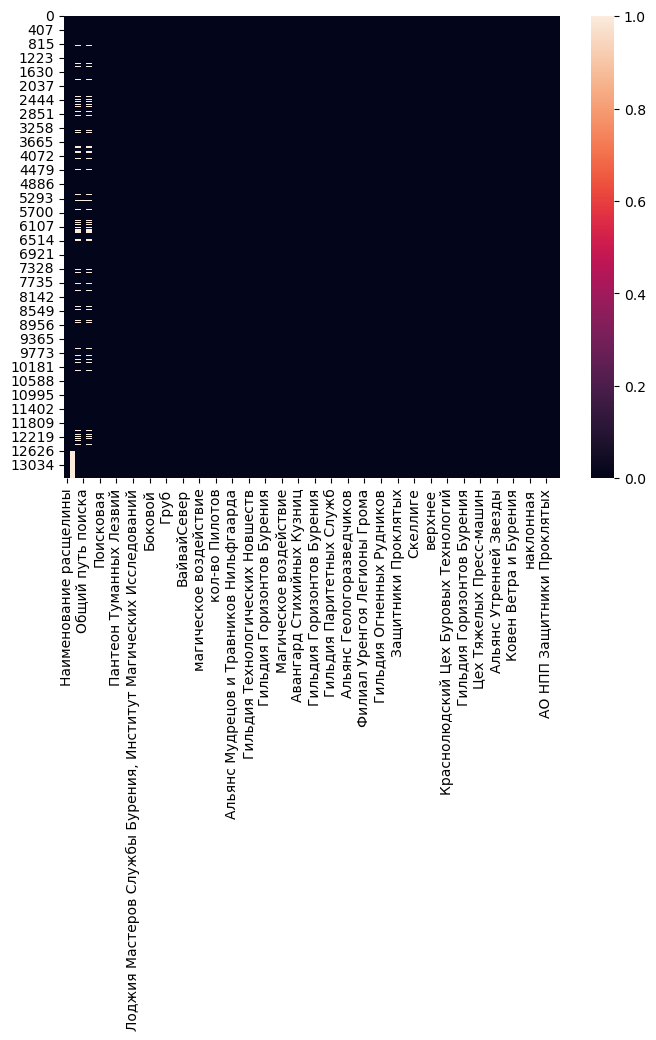

In [220]:
plt.figure(figsize=[8, 6])

sns.heatmap(NDF.isna())

In [221]:
NDF.isna().sum().sort_values(ascending=False)

Количество ремонтов                        1276
Количество простоев в поиске               1268
Глубина по отвилку                          798
Общий путь поиска                             4
Наименование расщелины                        0
                                           ... 
Альянс Мудрецов и Травников Нильфгаарда       0
Гильдия Сервисных РаботТЭК-Бурение            0
наклонная                                     0
кол-во Пилотов                                0
Холдинг Петровских Газовых Технологий         0
Length: 90, dtype: int64

Если количеств ремонтов нам неизвестно, логично предположить что они не выполнялись и тогда мы можем присвоить этим позициям с пропусками значение равное нулю


In [222]:
NDF['Количество ремонтов'].value_counts()

Количество ремонтов
0.900000     2011
0.000000     1914
1.800000     1396
2.700000     1059
3.600000      964
             ... 
63.000000       1
73.800003       1
58.500000       1
55.799999       1
68.400002       1
Name: count, Length: 80, dtype: int64

In [223]:
# mask_to_drop=['Количество ремонтов', 'Количество простоев в поиске', 'Глубина по отвилку', 'Общий путь поиска']
# vec1=NDF[NDF['Количество ремонтов']==np.nan].drop(mask_to_drop, axis=1).mean()
# vec2=NDF[NDF['Количество ремонтов']==0].drop(mask_to_drop, axis=1).mean()
# vec3=NDF[NDF['Количество ремонтов']>0].drop(mask_to_drop, axis=1).mean()

In [224]:
# vec=pd.concat([vec1, vec2, vec3], axis=1)

In [225]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [227]:
scaler = StandardScaler()
 
# стандартизируем данные и сразу поместим их в датафрейм
mice = pd.DataFrame(scaler.fit_transform(NDF), columns = NDF.columns)

In [228]:
from sklearn.tree import DecisionTreeRegressor

In [229]:
# создадим объект класса IterativeImputer и укажем необходимые параметры
mice_imputer = IterativeImputer(initial_strategy = 'mean', # вначале заполним пропуски средним значением
                                estimator = DecisionTreeRegressor(), # в качестве модели используем линейную регрессию
                                random_state = 42 # добавим точку отсчета
                                )
 
# используем метод .fit_transform() для заполнения пропусков в датасете mice
mice = mice_imputer.fit_transform(mice)
 
# вернем данные к исходному масштабу и округлим столбец Age
mice = pd.DataFrame(scaler.inverse_transform(mice), columns = NDF.columns)
# mice.Age = mice.Age.round(1)
# mice.head(7)


C:\Users\User\.conda\envs\py37\lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [230]:
# mice.isna().sum().sum()

In [231]:
NDF.isna().sum()

Наименование расщелины                      0
Глубина по отвилку                        798
Количество ремонтов                      1276
Общий путь поиска                           4
Количество простоев в поиске             1268
                                         ... 
Краснолюдский Цех Буровых Технологий        0
Защитники Проклятых ЗБС                     0
АО НПП Защитники Проклятых                  0
Сервисный Цех Глубоких Шахт Ковира          0
Холдинг Петровских Газовых Технологий       0
Length: 90, dtype: int64

In [233]:
X=NDF.fillna(NDF.median())

C:\Users\User\AppData\Local\Temp\ipykernel_10208\184991738.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=NDF.fillna(NDF.median())


In [234]:
NDF

,Наименование расщелины,Глубина по отвилку,Количество ремонтов,Общий путь поиска,Количество простоев в поиске,разведка,Поисковая,Разведочная,Поисково-оценочная,Пантеон Туманных Лезвий,Краснолюдский Цех Буровых Технологий,Филиал Мастеров Халл,"Лоджия Мастеров Службы Бурения, Институт Магических Исследований",Гильдия Горизонтов Бурения,Пилотный,Боковой,Дополнительный,Материнский,Груб,Ягод,Кувай,ВайвайСевер,Чаянда,ФилатовыйЦарич,магическое воздействие,кол-во Отвилков,вертикальная,...,Скеллиге,среднее,тупик,верхнее,пилот,основное,Краснолюдский Цех Буровых Технологий,Институт Буровых Служб,Союз Геомагических Сервисов,Гильдия Горизонтов Бурения,Цех Технических Дел Махакамской Крепости,Институт Магических Исследований,Цех Тяжелых Пресс-машин,Гильдия Новых Технологий,Механизированный Альянс по Добыче Минерального Масла,Альянс Утренней Звезды,Гильдия Нефтяных Полей Востока,Институт Магических Исследований,Ковен Ветра и Бурения,Технический Альянс Петра,вертикальная,наклонная,Краснолюдский Цех Буровых Технологий,Защитники Проклятых ЗБС,АО НПП Защитники Проклятых,Сервисный Цех Глубоких Шахт Ковира,Холдинг Петровских Газовых Технологий
0,2903,2889.000000,3.600000,2889.000000,3.600000,False,False,False,False,False,False,False,False,False,0,0,0,1,False,False,False,False,False,False,False,0,False,...,0,1,0,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0
1,1332,3474.000000,24.299999,5620.500000,0.000000,False,True,False,False,False,False,False,False,False,0,0,0,1,False,False,False,False,False,False,False,40,False,...,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0
2,1027,2596.500000,3.600000,2600.100098,6.300000,False,True,False,False,False,False,False,False,False,0,0,0,1,False,False,False,False,False,False,False,0,False,...,0,1,0,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0
3,4208,2699.100098,0.000000,2699.100098,3.600000,False,True,False,False,False,False,False,False,False,0,0,0,1,False,False,False,False,False,False,False,0,False,...,0,1,0,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0
4,9352,3193.199951,5.400000,3195.000000,7.200000,False,False,False,False,False,True,False,False,False,0,0,0,1,False,False,False,False,False,False,False,0,False,...,0,1,0,1,0,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,3806,NaN,0.000000,985.500000,0.900000,False,True,False,False,False,True,False,False,False,0,1,0,0,False,False,False,False,False,False,False,0,False,...,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0
13412,5419,NaN,7.200000,4342.500000,9.000000,False,True,False,False,False,True,False,False,False,0,0,0,1,False,False,False,False,False,False,True,0,False,...,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0
13413,5309,NaN,NaN,4345.200195,NaN,False,True,False,False,False,False,False,False,False,0,0,1,1,False,False,False,False,False,False,False,40,False,...,0,1,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0
13414,5515,NaN,NaN,1262.699951,NaN,False,True,False,False,False,True,False,False,False,0,1,0,0,False,False,False,False,False,False,True,0,False,...,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1,0,0,0,0


In [235]:
X=NDF

In [236]:
X=mice

In [248]:
X=NDF.fillna(0)


C:\Users\User\AppData\Local\Temp\ipykernel_10208\480435972.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=NDF.fillna(0)


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
 

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.2)

In [244]:
# lr = LinearRegression()

# sfs = SequentialFeatureSelector(lr,
#           k_features='parsimonious',
#           verbose=1,
#           scoring='r2',
#           cv=5,
#           n_jobs=-1)

# sfs = sfs.fit(X_train, y_train)

In [249]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import optuna
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

def objective(trial, X_train, y_train, X_test, y_test):
    """Функция для оптимизации гиперпараметров XGBoost с помощью Optuna."""
    
    params = {
        'objective': 'reg:absoluteerror',  # Указываем 'reg:squarederror' для регрессии
        'eval_metric': 'rmse',            # Метрика оценки
        'tree_method': 'hist',            # Для ускорения
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],  # Передаем тестовые данные
              verbose=False)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

def find_best_pca_components(X, y):
    """Находит оптимальное количество главных компонент с помощью PCA."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    pca.fit(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    # можно задать порог объясненной дисперсии (например, 95%)
    n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1 
    return n_components


# Пример использования:
# Замените 'your_data.csv' на путь к вашему файлу данных


# Находим оптимальное количество главных компонент
best_n_components = find_best_pca_components(X.fillna(0), y_num)
print(f"Оптимальное количество главных компонент: {best_n_components}")

# Применяем PCA
pca = PCA(n_components=best_n_components)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

Оптимальное количество главных компонент: 66


In [250]:
X_pca.shape

(13406, 66)

In [251]:
# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_num, test_size=0.2, random_state=42)


# Оптимизируем гиперпараметры XGBoost с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100) # увеличьте n_trials для более тщательной оптимизации

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее RMSE:", study.best_value)

[I 2024-11-14 23:41:09,924] A new study created in memory with name: no-name-bf60322b-e5c4-4d88-98eb-098a18173623
[I 2024-11-14 23:41:28,633] Trial 0 finished with value: 15.773825645446777 and parameters: {'n_estimators': 864, 'max_depth': 9, 'learning_rate': 0.0026374329560397984, 'subsample': 0.9232343831050522, 'colsample_bytree': 0.8931978471630486, 'min_child_weight': 9, 'gamma': 5.3454017296457685}. Best is trial 0 with value: 15.773825645446777.
[I 2024-11-14 23:41:30,092] Trial 1 finished with value: 14.624380111694336 and parameters: {'n_estimators': 323, 'max_depth': 4, 'learning_rate': 0.07172073685517047, 'subsample': 0.3311195733308231, 'colsample_bytree': 0.8356981442262499, 'min_child_weight': 1, 'gamma': 2.4592600668823508}. Best is trial 1 with value: 14.624380111694336.
[I 2024-11-14 23:41:32,722] Trial 2 finished with value: 14.73859691619873 and parameters: {'n_estimators': 381, 'max_depth': 7, 'learning_rate': 0.02779507448002708, 'subsample': 0.4897723768643143, 

KeyboardInterrupt: 

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
X=NDF[list(sfs.k_feature_names_)]

In [ ]:
import pprint as pprint
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y_train)
y_pred = lr.predict(X_test_sfs)

k = len(sfs.k_feature_names_)
n = X_train.shape[0]
r2 = sfs.k_score_
adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))


print(f'TRAIN R2: {r2}')
print(f'TRAIN ADJUSTED R2: {adj_r2}')
print(f'TEST R2: {r2_score(y_test, y_pred)}')
print(f'k: {k}')
pprint(list(sfs.k_feature_names_))

In [ ]:
# model = LinearRegression()

# sfs = SequentialFeatureSelector(model)
# sfs.fit(X.fillna(0), y_num)
# selected_feature = X.columns[sfs.get_support()]


# X_train_sfs = sfs.transform(X_train)
# X_test_sfs = sfs.transform(X_test)

# lr.fit(X_train_sfs, y_train)
# y_pred = lr.predict(X_test_sfs)

# k = len(sfs.k_feature_names_)
# n = X_train.shape[0]
# r2 = sfs.k_score_
# adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))

# pprint(HYP)
# print(f'TRAIN R2: {r2}')
# print(f'TRAIN ADJUSTED R2: {adj_r2}')
# print(f'TEST R2: {r2_score(y_test, y_pred)}')
# print(f'k: {k}')
# pprint(list(sfs.k_feature_names_))

In [ ]:
# Import Linear Regression and Sequential Feature Selector from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
 
# Initializing the Linear Regression model
model = LinearRegression()
 
# Perform Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=1)

In [ ]:
X=X[selected_feature]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [ ]:
xgb=RandomForestRegressor()
xgb.fit(X_train, y_train)

mae(xgb.predict(X_test), y_test )

# [mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score]

# mean_absolute_percentage_error(xgb.predict(X_test), y_test )

print(mape(xgb.predict(X_test), y_test)*100)

print(mse(xgb.predict(X_test), y_test, squared=False))

print(mae(xgb.predict(X_test), y_test))

In [ ]:
selected_feature

In [ ]:
X_num

In [ ]:
X['Глубина по отвилку_X_num_X_num_X_num'].dtypes

In [ ]:
y_test.mean()

In [ ]:
rf.predict(X_test)

In [ ]:
Модель несмотря на импьютинг даёт большую ошибку, попробуем поработать с признаками 

In [ ]:
NDF_0=NDF.fillna(0)

In [ ]:
for col in NDF.columns:
    # print(col, NDF[col].dtypes)
    print(col, NDF[col].dtypes.unique())
    # if NDF[col].dtypes in ['int64', 'float64', 'O']:
    #     print 
    #     # try: 
    #     #     NDF[col] = NDF[col].astype(bool)
    #     # except AttributeError: 
    #     #     print(col)
    #     # # Преобразуем к типу boolean только если столбец не уже boolean
            


In [ ]:
NDF.select_dtypes(include=['int64'])=NDF.select_dtypes(include=['int64']).astype(bool)

In [ ]:
NDF.select_dtypes(exclude=['float32', 'int64', 'int64']).astype()

In [ ]:
sns.heatmap(NDF.corr())

In [ ]:
correlations=NDF.corr().stack().reset_index()

In [ ]:
correlations.columns=['1st', '2nd', 'corrs']

In [ ]:
selected_correlations=correlations.query('-1<corrs<1').sort_values(by='corrs').query('abs(corrs)>0.5').iloc[::2]
selected_correlations

Мы получаем отфильтрованную тепловую диаграмму с самыми взамосвязанными признаками

In [ ]:
pivot=pd.pivot_table(data=selected_correlations, index=['1st'], columns=['2nd'], values=['corrs'])

In [ ]:
sns.heatmap(pivot)

In [ ]:
feature_selection(NDF, y_num, 'ВСЕ', n_estimators=100, random_state=42, threshold=0.04, plotting=True)

In [ ]:
# NDF['Наименование расщелины', 'Глубина по отвилку', 'Количество ремонтов',
#         'Общий путь поиска', 'Количество простоев в поиске']

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(NDF)

# shap.summary_plot(shap_values, X_wells, plot_type="bar")



In [ ]:
pca = PCA(n_components=4)
pca.fit(NDF_0[['Наименование расщелины', 'Глубина по отвилку',	'Количество ремонтов',	'Общий путь поиска', 'Количество простоев в поиске', 'кол-во Отвилков', 'кол-во Пилотов']])

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


In [ ]:
shap.summary_plot(shap_values, X_wells)

In [ ]:
mask=[NDF.select_dtypes(include='object').columns]

In [ ]:
mask

In [ ]:
NDF.loc[mask].dtypes

In [ ]:
# pd.to_numeric(
    
NDF[NDF.select_dtypes(include='object').columns]=NDF[NDF.select_dtypes(include='object').columns].apply(pd.to_numeric)

In [ ]:
NDF[NDF.select_dtypes(include='object').columns]=NDF[NDF.select_dtypes(include='object').columns].apply(pd.to_numeric)

In [ ]:
NDF.dtypes.unique()

In [ ]:
a=NDF_0.drop(['Наименование расщелины', 'Глубина по отвилку',	'Количество ремонтов',	'Общий путь поиска', 'Количество простоев в поиске', 'кол-во Отвилков', 'кол-во Пилотов'], axis=1)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(a, y_num)
rf=LinearRegression()
rf.fit(X_train, y_train)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
train_x_norm = scaler.transform(X_train)

pca = PCA()
comp = pca.fit(train_x_norm)

# We plot a graph to show how the explained variation in the 129 features varies with the number of principal components
plt.plot(np.cumsum(comp.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
sns.despine();

In [ ]:
import xgboost as xgb

In [ ]:
xgb=XGBRegressor()

In [ ]:
pca = PCA(n_components=40).fit(train_x_norm)
train_x_transform = pca.transform(train_x_norm)
test_x_transform = pca.transform(scaler.transform(X_test))

In [ ]:
dtrain = xgb.DMatrix(train_x_transform, label=y_train)
dtest = xgb.DMatrix(test_x_transform, label=y_test)

In [ ]:
xgb.train(dtrain)

In [ ]:
import optuna

In [ ]:
def objective(trial):
    
# params specifies the XGBoost hyperparameters to be tuned
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        'max_depth': trial.suggest_int('max_depth', 10, 25),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.50, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
        'gamma': trial.suggest_int('gamma', 0, 10),
        'tree_method': 'gpu_hist',  
        'objective': 'binary:logistic'
    }
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
# trials will be evaluated based on their accuracy on the test set
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [ ]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=25, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [ ]:
100*mse(y_test, rf.predict(X_test), squared=False)

In [ ]:
pd.concat([pd.Series(xgb.predict(X_test), index=X_test.index), y_test], axis=1)

In [ ]:
forking=pd.get_dummies(df["Тип отвилка"].str.split(';', expand=True))
forking

In [ ]:
unique_classes=dict()
for col in df.select_dtypes(include='object').columns[:-3]:
    uniques=df[col].unique()
    unique_classes[col]=uniques
unique_classes 

In [ ]:
# Разбиваем строку на отдельные слова
# column_split = df["Участки"].str.split(" +")

# # Создаем новый DataFrame, где каждая строка соответствует слову
# df_split = column_split.apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame(name="word")

# df_split

Выберем основные слова, комбинациями которых и являются описания

In [ ]:
# words = list(set([word.split('_')[1].strip() for word in sites.columns]))

# print(words[1:])
# words=words[1:]


In [ ]:
def feat_ohe(series, word_to_remove='', splitter=','):
    ohevar=pd.get_dummies(series.str.replace(word_to_remove, '').str.split(splitter, expand=True))
    cols=list(set([col.split('_')[1].strip() for col in ohevar.columns]))[1:]
    for col in cols:
        ohevar[str(col)]=ohevar[ohevar.columns[ohevar.columns.str.contains(col)]].sum(axis=1)
    return ohevar[cols]
    # return ohevar

feat_ohe(df['Участки'], word_to_remove='укрепление', splitter='+')

In [ ]:
feat_ohe(df['Тип отвилка'], word_to_remove='укрепление', splitter=';')

In [ ]:
df['Технологическая особенность']

In [ ]:
# site_upper, site_upper, site_open, site_pilot, site_medium, site_dead_end, site_insulation =[], [], [], [], [], [], []
# for col in sites.columns:
#     if col.contains('верхнее'):
        
# for word in words:
#     sites[str(word)]=sites[sites.columns[sites.columns.str.contains(word)]].sum(axis=1)

In [ ]:
df=pd.concat([df, sites[words]], axis=1).drop(columns=['Участки'])

In [ ]:
df.columns

In [ ]:
df['Тип инструмента'].value_counts(normalize=True)

In [ ]:
df[['Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке']]

Данне по типу инструмента присутствуют только в 3% записей, признак не информативен

In [ ]:
print(list(feat_ohe(df['Помощник по контролю поиска'], word_to_remove='', splitter=';').columns.sort_values()))

In [ ]:
print(list(feat_ohe(df['Помощник по поиску'], word_to_remove='укрепление', splitter=';').columns.sort_values()))

In [ ]:
for col in df.columns[df.columns.str.contains('Помощник')]:
    print(str(col).upper())
    print(list(feat_ohe(df[col], word_to_remove='укрепление', splitter=';').columns.sort_values()), '\n\n\n')

In [ ]:


# for i in 
sites[sites.columns[sites.columns.str.contains('верхнее')]]

# .sum(axis=1)

In [ ]:
Участки

In [ ]:
A=df["Участки"]
# Шаг 1: Разделить строки по символу '+', удалить дубликаты и пустые значения
A_normalized = A.str.split(r'\s*\+\s*').apply(lambda x: sorted(set(filter(None, x))))

# Шаг 2: Преобразовать в индикаторный DataFrame
B = pd.DataFrame([{val: 1 for val in row} for row in A_normalized]).fillna(0).astype(int)

# Шаг 3: Убедиться, что все нужные колонки присутствуют
for column in ['тупик', 'верхнее', 'среднее', 'основное']:
    if column not in B.columns:
        B[column] = 0

# Шаг 4: Упорядочить колонки
B = B[['тупик', 'верхнее', 'среднее', 'основное']]

print(B)


In [ ]:
A=df["Участки"]
A.dtypes

In [ ]:
def classess_list(col):
    unique_classes[col].sort()
    return unique_classes[col]

print(classess_list('Участки'))

In [ ]:
df['Участки'].str.replace('укрепление', "").str.split(pat='+', expand=True)

In [ ]:
df.select_dtypes(include='object').unique()

In [ ]:
# df['срок поиска артефакта']=df.iloc[:, -2:].diff(axis=1)['Дата окончания поиска']

In [ ]:
a=df.iloc[:, -3:-1]

In [ ]:
(a.iloc[:,-1]-a.iloc[:,-2]).dt

In [ ]:
pd.crosstab(df['Наименование королевства'], df['Наименование земли'])

In [ ]:
df.groupby(['Наименование королевства'])['Цель'].value_counts(normalize=True).unstack()*100

In [ ]:
df.groupby(['Назначение расщелины','Цель'])[['Тип расщелины', 'Категория расщелины']].value_counts().unstack()*100

Теперь рассмотрим категориальные признаки

In [ ]:
X=df.loc[df['Cрок получения артефактов'].notna(), ['Общее время поиска']]

# y=df.loc[df['Cрок получения артефактов'].notna(), ['Cрок получения артефактов']]